## Project Description

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!<br>

The chemical compositions are measured as the weight percent in corresponding oxide.

### Attribute Information

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)<br>
•	1- building_windows_float_processed<br>
•	2- building_windows_non_float_processed<br>
•	3- vehicle_windows_float_processed<br>
•	4- vehicle_windows_non_float_processed (none in this database)<br>
•	5- containers<br>
•	6- tableware<br>
•	7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7).<br>

**Predict** : Type of glass

## Dataset Link

https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [2]:
columns = ['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv', header=None, names=columns)
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


All the variables in the dataset are numeric.<br>
'Id number' is a nominal variable which does not provide any quantitative value.<br>
'Type of glass' is the output or target variable which is categorical with 7 different categories.<br>
Rest of the variables are independent or input variables.

### Exploratory Data Analysis

In [3]:
# Getting dimensions of the dataset
df.shape

(214, 11)

The dataset contains 214 rows and 11 columns. Out of the 11 columns, 9 are independent variables or input variables, 1 is a nominal variable and 1 is the target or output variable.

In [4]:
# Getting the column names
df.columns.to_list()

['Id number',
 'RI',
 'Na',
 'Mg',
 'Al',
 'Si',
 'K',
 'Ca',
 'Ba',
 'Fe',
 'Type of glass']

The independent variables are:<br>
'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'<br>

The output os target variable is:<br>
'Type of glass'

In [5]:
# Checking datatype of each column
df.dtypes

Id number          int64
RI               float64
Na               float64
Mg               float64
Al               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type of glass      int64
dtype: object

Since all the data are numeric, the dataset only has int64 and float64 datatypes.

In [6]:
# Checking for null values
df.isna().sum()

Id number        0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

There are no missing values in tha dataset.

In [7]:
# Checking for duplicate values
df.duplicated().sum()

0

There are also no duplicate values in the dataset.

In [8]:
# Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


This gives an overview of the dataset. From here, we can see that there are no missing values in the dataset. We can also observe the datatypes.<br>

Since, all the data is numerical as is evident from the data types, we can safely assume that there are no special characters or whitespaces present. Otherwise the data type would have been different. We can proceed with the analysis, as the data is numeric and does not contaion any missing or NaN values.

In [9]:
# Number of unique values for each variable
df.nunique()

Id number        214
RI               178
Na               142
Mg                94
Al               118
Si               133
K                 65
Ca               143
Ba                34
Fe                32
Type of glass      6
dtype: int64

As we can observe, only the target variable (Type of glass) is categorical. Rest of the input variables seem to be numerical and continuous. Only 'Id number' is nominal.<br>
There are 7 types of glasses but we can observe only 6 unique values.

In [10]:
# Frequency of occurence of each value in 'Type of glass' column
df['Type of glass'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type of glass, dtype: int64

It is observed that there are no records in the dataset for 'Type of glass': 4, as is mentioned in the Project Description.<br>
Also there are more records of classes 1 and 2 in the dataset, than the rest of the glasses.

#### Transforming the problem to binary classification

Classes 1-4 are window glasses and classes 5-7 are non-window glasses. We can divide the datset into window (0) and non-window glasses (1) for a binary classification.

In [11]:
# Feature transformation
df['Glass type'] = df['Type of glass'].apply(lambda x: 0 if (x>=1 and x<=4) else 1)

In [12]:
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,Glass type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0


In [13]:
# Checking the frequency of window and non-window glasses
df['Glass type'].value_counts()

0    163
1     51
Name: Glass type, dtype: int64

As expected, there are more window glasses than non-window glasses in the dataset. This leads to class imbalance issue which will be resolved when training the model.

In [14]:
# Dropping the 'Type of glass column'
df.drop('Type of glass', axis=1, inplace=True)

#### Dataset description

In [15]:
# Statistical summary of columns (numerical data)
df.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,0.238318
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,0.427053
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,0.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,0.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,0.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,0.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,1.000000


Observations from the statistical summary:
- RI, Na, Al, Ca, Ba, and Fe have mean value greater than the median. So these variables are skewed to the right. Among these Al, Ba and Fe seem to have a higher difference which indicates greater skewness.
- Mg, Si and K have mean values less than the median. So these variables are skewed to the left.
- Id number, being a nominal sequential variable has no skewness.
- Glass type is also  skewed to the right. Since it is a categorical variable, it means one category is more represented in the dataset than the other.

In [16]:
# Numerical columns for data visualisation
num_cols = df.drop(columns=['Id number', 'Glass type'])
num_cols.columns.to_list()

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

These are the columns that will be used for numerical data visualisation.

#### Data Visualisation

In [17]:
# Setting uniform color palette
sns.set_palette(sns.color_palette("hls"))

0    163
1     51
Name: Glass type, dtype: int64


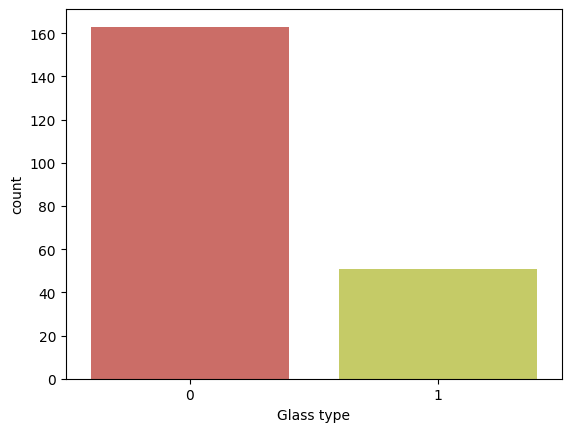

In [18]:
# Visualising the frequency of Glass types in the dataset
print(df['Glass type'].value_counts())
sns.countplot(x=df['Glass type'])
plt.show()

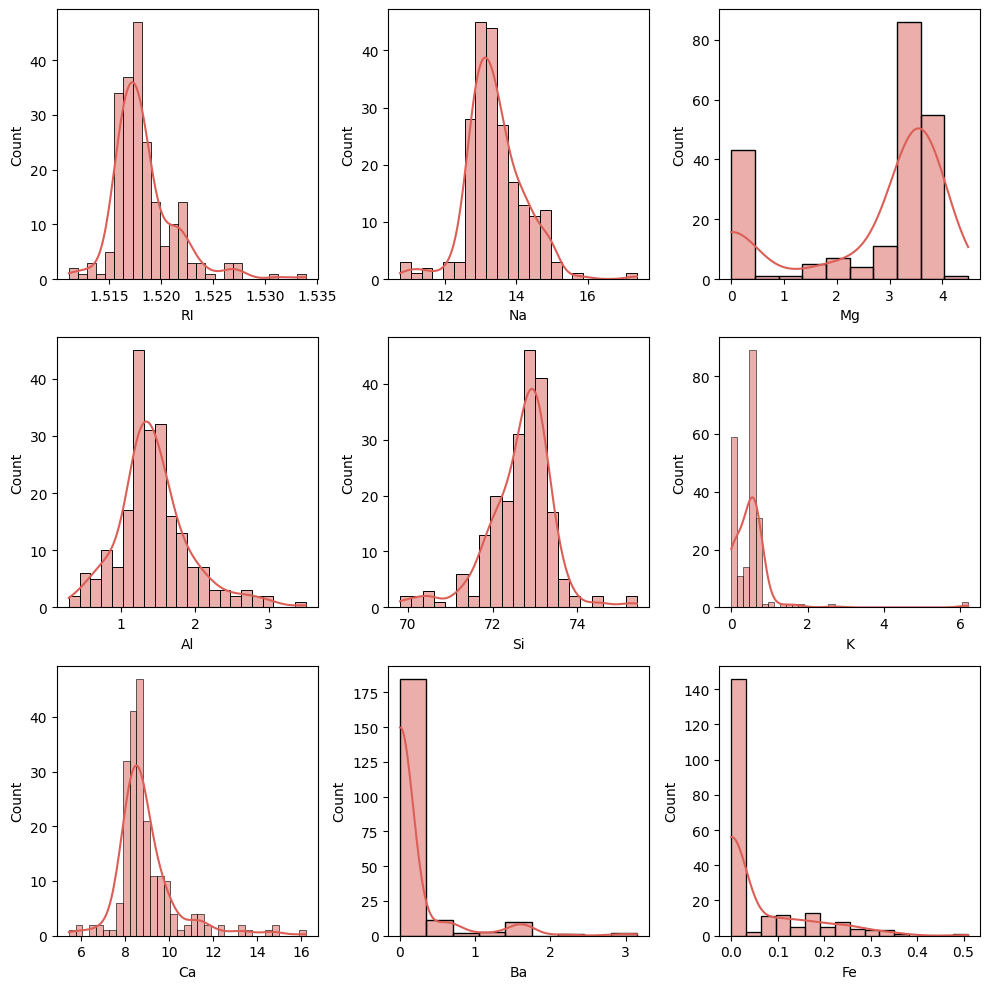

In [19]:
# Data distribution for numerical columns
plt.figure(figsize=(10, 10))
plot_num = 1
for col in num_cols:
    if plot_num <= 9:
        ax = plt.subplot(3, 3, plot_num)
        sns.histplot(df[col], kde=True)
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

- RI, Na, Al, Ca, Ba, and Fe are all skewed to the right (positively skewed).
- Mg, Si and K are skewed to the left (negatively skewed).

#### Bivariate Analysis

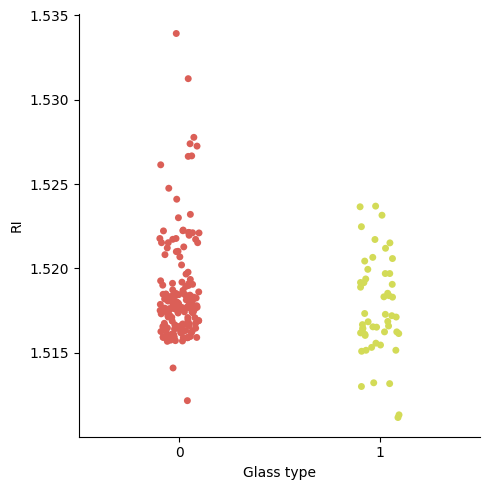

In [20]:
# Comparison between RI and Glass type
sns.catplot(x='Glass type', y='RI', hue='Glass type', data=df)
plt.show()

Window glass types tend to have a higher RI than non-window glass types. There seem to be no non-window glasses with RI above 1.525 in the given data.

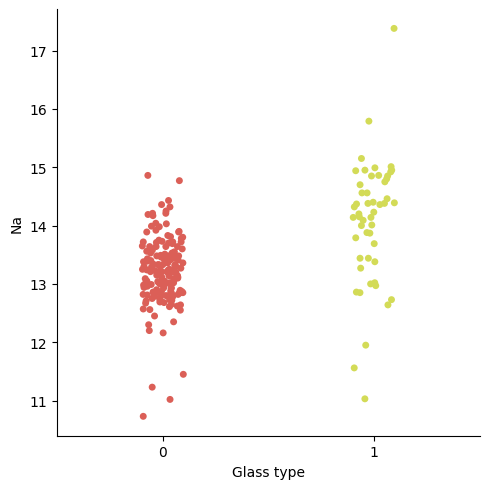

In [21]:
# Comparison between Na and Glass type
sns.catplot(x='Glass type', y='Na', hue='Glass type', data=df)
plt.show()

Non-window glasses seem to have a higher Na content than window glasses. For window glasses the highest Na value observed is 15.

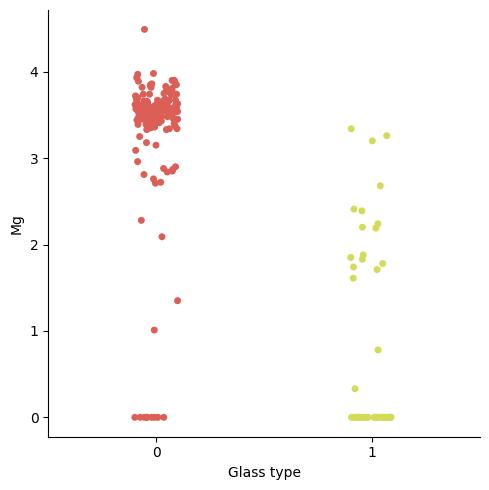

In [22]:
# Comparison between Mg and Glass type
sns.catplot(x='Glass type', y='Mg', hue='Glass type', data=df)
plt.show()

Mg values seem to be higher in window glasses and are mostly concentrated between Mg content of 3 and 4. There is no Mg content (value 0) for a few window and several non-window glasses.

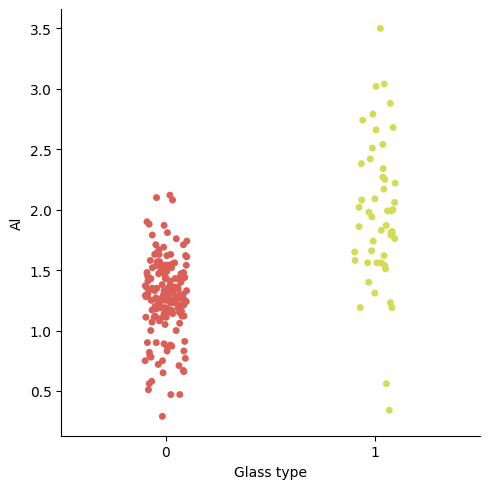

In [23]:
# Comparison between Al and Glass type
sns.catplot(x='Glass type', y='Al', hue='Glass type', data=df)
plt.show()

The Al content seems to be higher for non-window glasses compared to window glasses. Majority of window glasses have Al values beween 0.5 and 2, while the non window glasses can have values going from 1.5 to 3.5.

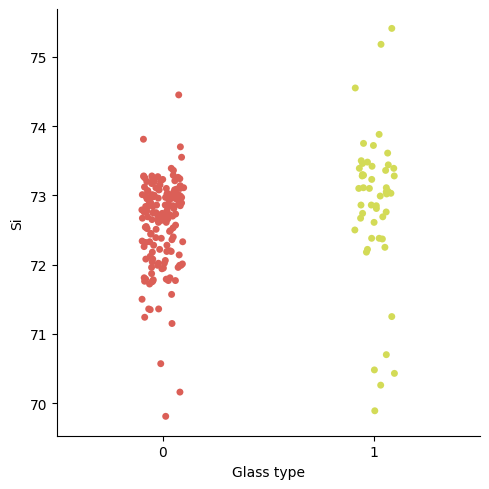

In [24]:
# Comparison between Si and Glass type
sns.catplot(x='Glass type', y='Si', hue='Glass type', data=df)
plt.show()

Si for window glasses majorly fall between 71 and 74, while that for non-window glasses fall between 72 and 74. There are a few Si values between 70 and 71 observed for both glasses in this dataset.

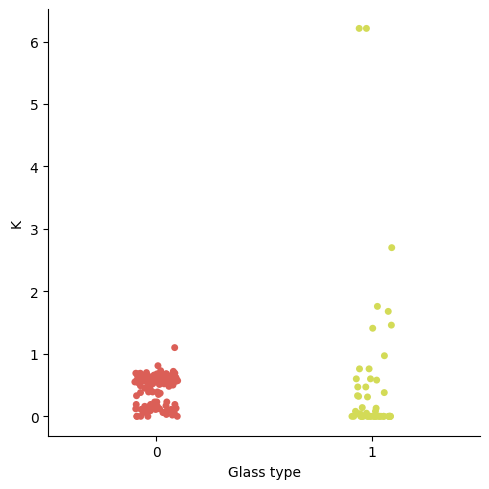

In [25]:
# Comparison between K and Glass type
sns.catplot(x='Glass type', y='K', hue='Glass type', data=df)
plt.show()

The K value seems to be between 0 and 1 for window glasses, while the range maybe higher (upto 6) for non-window glasses.

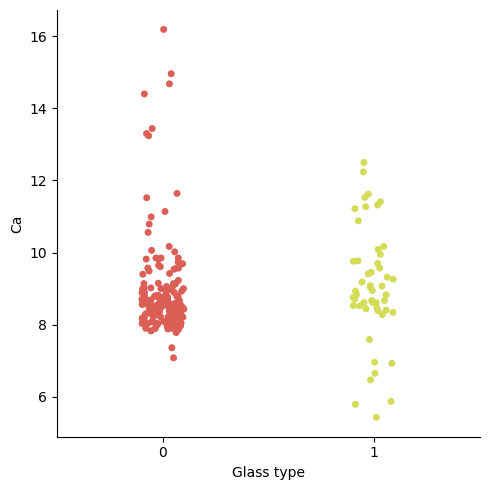

In [26]:
# Comparison between Ca and Glass type
sns.catplot(x='Glass type', y='Ca', hue='Glass type', data=df)
plt.show()

The Ca value for window glasses is mostly observed to be between 8 and 16. The Ca value for non-window glasses is between 5 and 13.

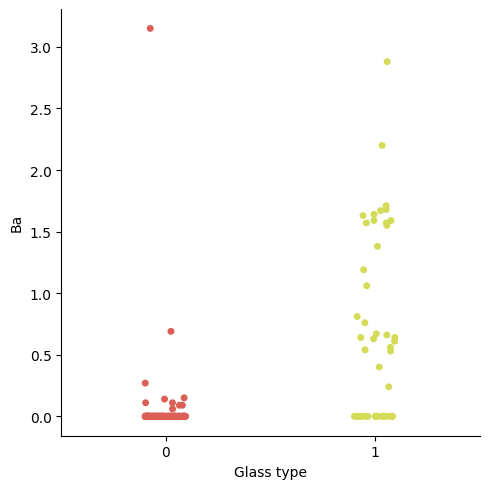

In [27]:
# Comparison between Ba and Glass type
sns.catplot(x='Glass type', y='Ba', hue='Glass type', data=df)
plt.show()

The Ba values for window glasses is almost lower than BA values for non-window glasses. But a single case is observed where Ba value is higher for window glass than non-window glass.

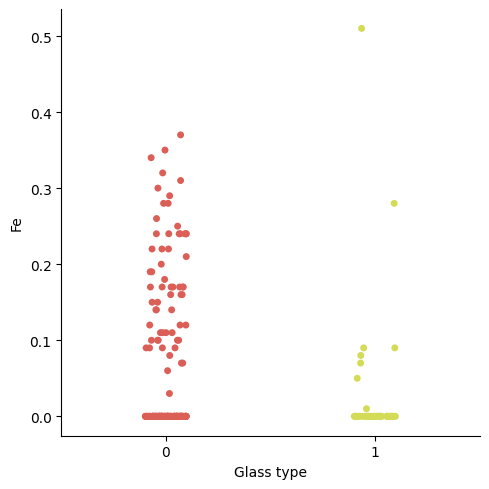

In [28]:
# Comparison between Fe and Glass type
sns.catplot(x='Glass type', y='Fe', hue='Glass type', data=df)
plt.show()

The Fe content for several window as well as non- glasses seem to be zero. Otherwise Fe content tends to be higher for window glasses than non-window glasses, except a single case where FE value for non-window glass is higher.

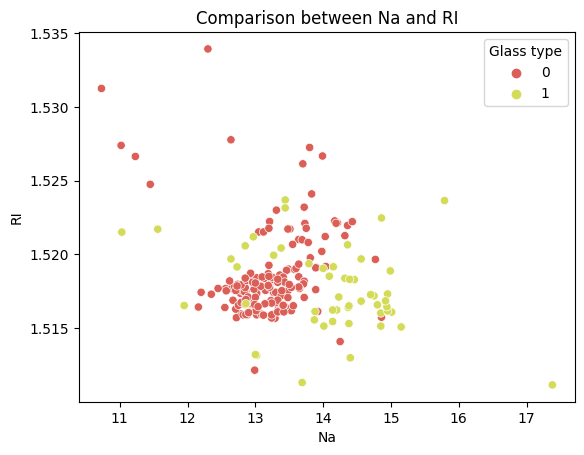

In [29]:
# Comparing RI and Na
sns.scatterplot(x='Na', y='RI', hue='Glass type', data = df)
plt.title('Comparison between Na and RI')
plt.show()

There seems to be almost no correlation between Na and RI.

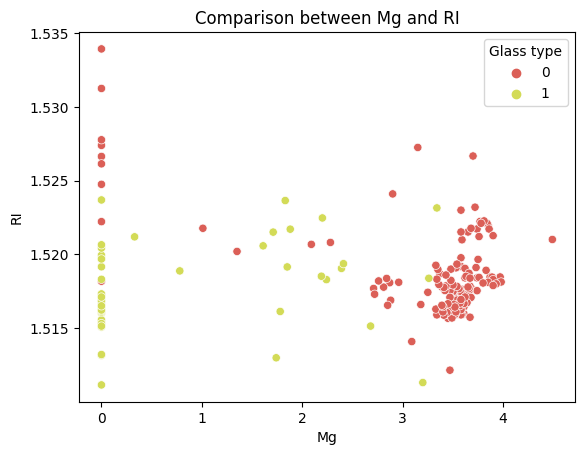

In [30]:
# Comparing RI and Mg
sns.scatterplot(x='Mg', y='RI', hue='Glass type', data = df)
plt.title('Comparison between Mg and RI')
plt.show()

No correlation is observed between Mg and RI.

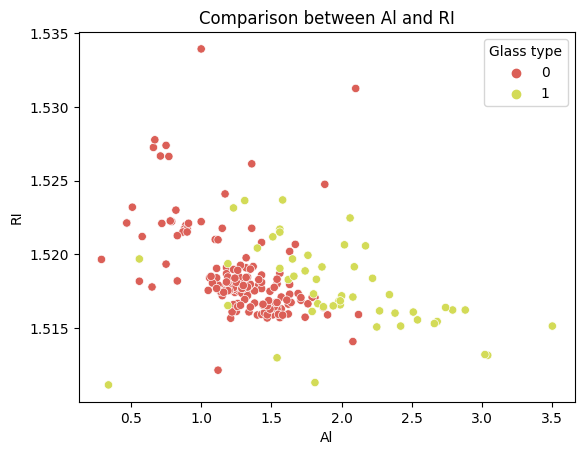

In [31]:
# Comparing RI and Al
sns.scatterplot(x='Al', y='RI', hue='Glass type', data = df)
plt.title('Comparison between Al and RI')
plt.show()

There seems to be moderate negative correlation between Al and RI.

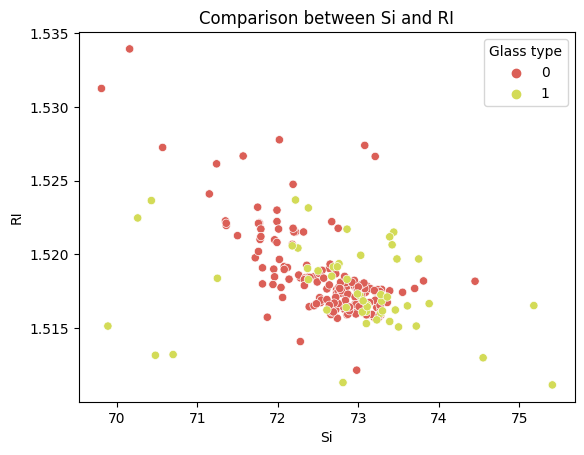

In [32]:
# Comparing RI and Si
sns.scatterplot(x='Si', y='RI', hue='Glass type', data = df)
plt.title('Comparison between Si and RI')
plt.show()

A moderate negative correlation is observed between Si and RI.

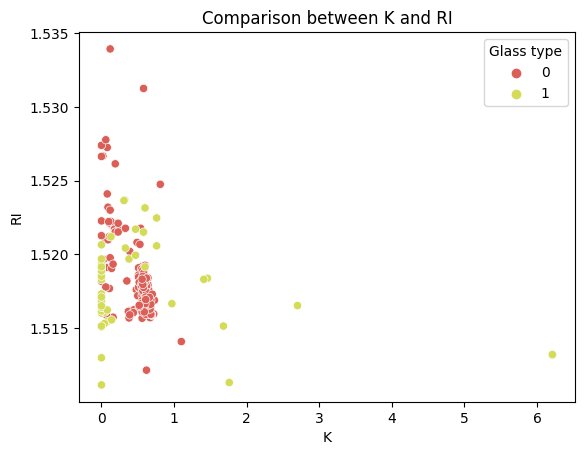

In [33]:
# Comparing RI and K
sns.scatterplot(x='K', y='RI', hue='Glass type', data = df)
plt.title('Comparison between K and RI')
plt.show()

A weak negative correlation is observed between K and RI.

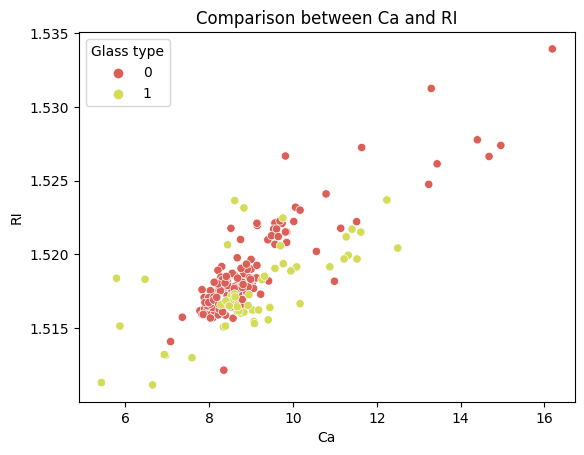

In [34]:
# Comparing RI and Ca
sns.scatterplot(x='Ca', y='RI', hue='Glass type', data = df)
plt.title('Comparison between Ca and RI')
plt.show()

A moderate positive correlation can be observed between Ca and RI.

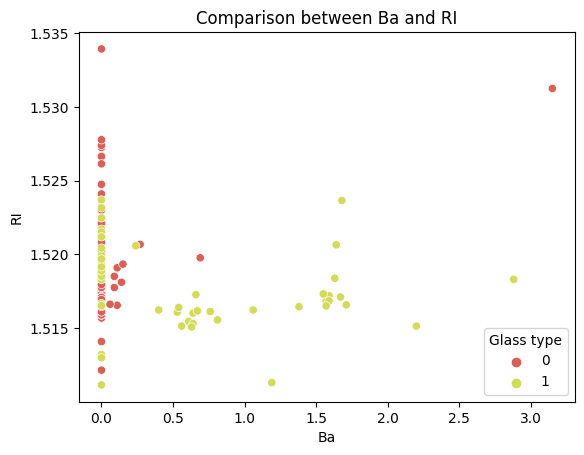

In [35]:
# Comparing RI and Ba
sns.scatterplot(x='Ba', y='RI', hue='Glass type', data = df)
plt.title('Comparison between Ba and RI')
plt.show()

A weak negative correlation is observed between Ba and RI.

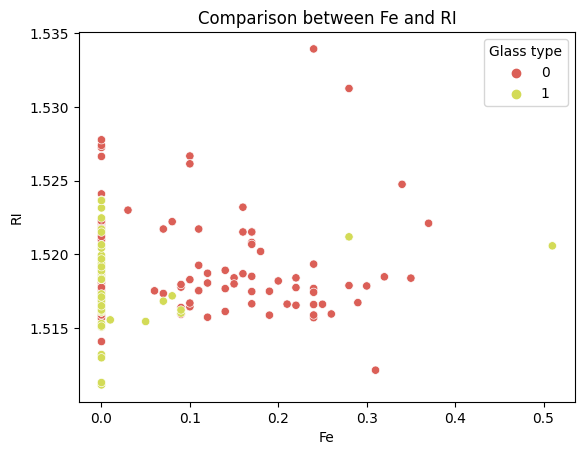

In [36]:
# Comparing RI and Fe
sns.scatterplot(x='Fe', y='RI', hue='Glass type', data = df)
plt.title('Comparison between Fe and RI')
plt.show()

No correlation is observed between Fe and RI.

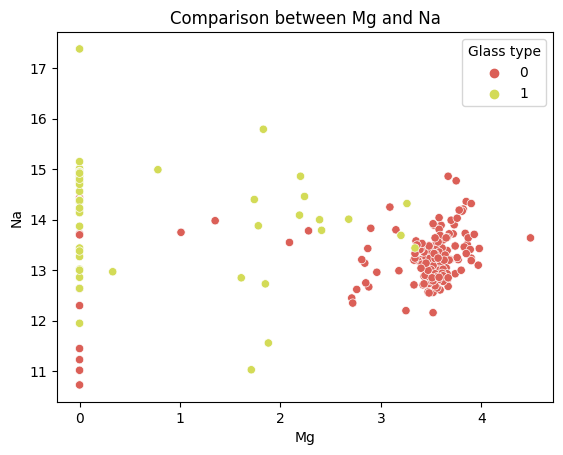

In [37]:
# Comparing Na and Mg
sns.scatterplot(x='Mg', y='Na', hue='Glass type', data = df)
plt.title('Comparison between Mg and Na')
plt.show()

Mg and Na have a moderate negative correlation.

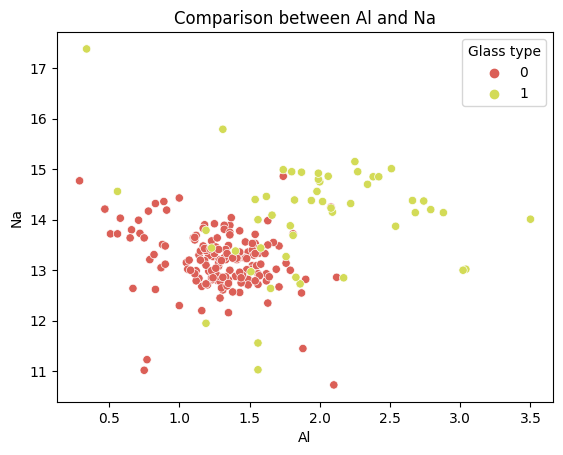

In [38]:
# Comparing Na and Al
sns.scatterplot(x='Al', y='Na', hue='Glass type', data = df)
plt.title('Comparison between Al and Na')
plt.show()

Al and Na have a very weak correlation whcih is positive.

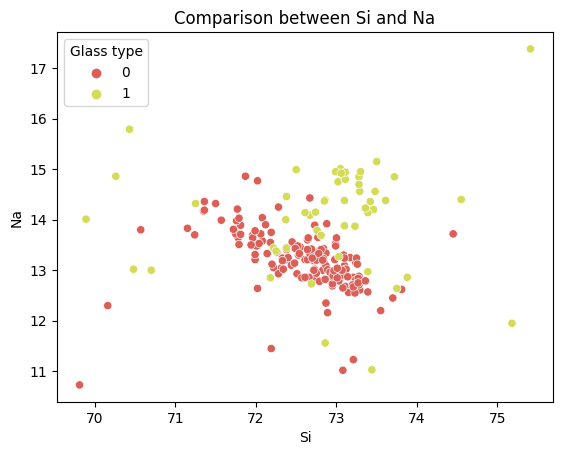

In [39]:
# Comparing Na and Si
sns.scatterplot(x='Si', y='Na', hue='Glass type', data = df)
plt.title('Comparison between Si and Na')
plt.show()

Si and Na have a very weak negative correlation.

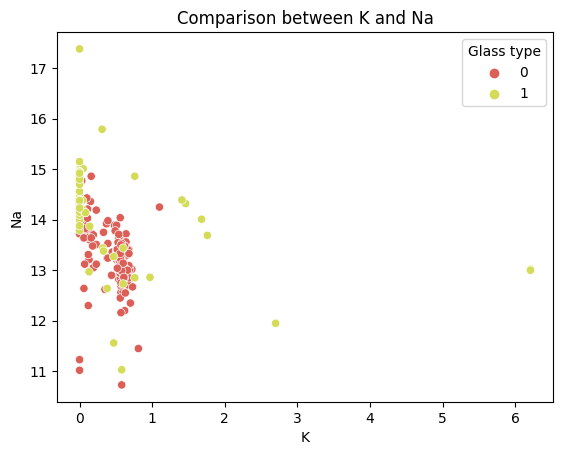

In [40]:
# Comparing Na and K
sns.scatterplot(x='K', y='Na', hue='Glass type', data = df)
plt.title('Comparison between K and Na')
plt.show()

A moderately negative correlation is observed between K and Na.

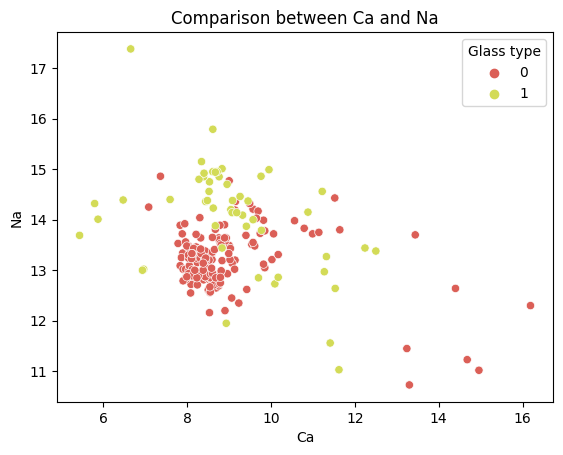

In [41]:
# Comparing Na and Ca
sns.scatterplot(x='Ca', y='Na', hue='Glass type', data = df)
plt.title('Comparison between Ca and Na')
plt.show()

No correlation is observed between Ca and Na.

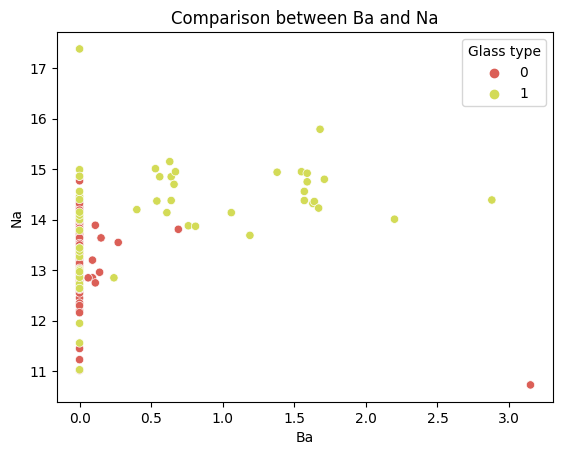

In [42]:
# Comparing Na and Ba
sns.scatterplot(x='Ba', y='Na', hue='Glass type', data = df)
plt.title('Comparison between Ba and Na')
plt.show()

Ba and Na have a moderately psitive correlation.

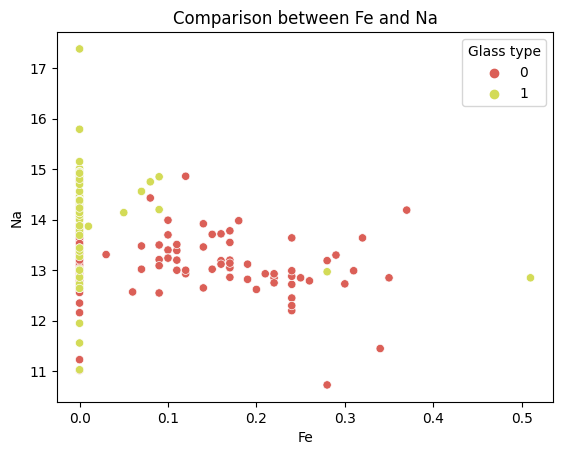

In [43]:
# Comparing Na and Fe
sns.scatterplot(x='Fe', y='Na', hue='Glass type', data = df)
plt.title('Comparison between Fe and Na')
plt.show()

Fe and Na have a very weak linear relationship which seems to be negative.

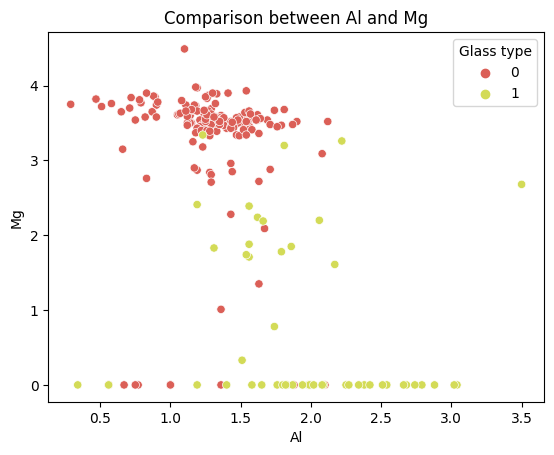

In [44]:
# Comparing Mg and Al
sns.scatterplot(x='Al', y='Mg', hue='Glass type', data = df)
plt.title('Comparison between Al and Mg')
plt.show()

Moderately negative correlation is observed between Al and Mg.

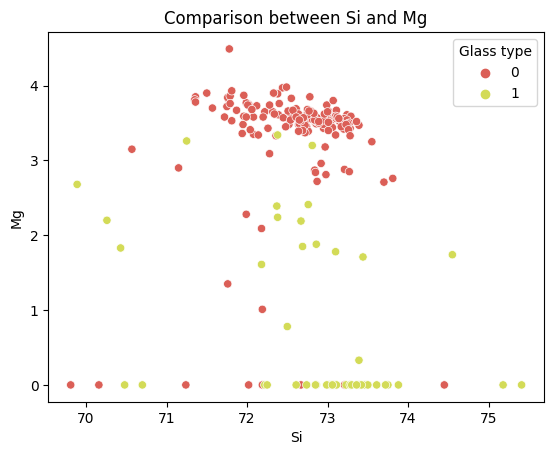

In [45]:
# Comparing Mg and Si
sns.scatterplot(x='Si', y='Mg', hue='Glass type', data = df)
plt.title('Comparison between Si and Mg')
plt.show()

Si and Mg have a moderately negative correlation.

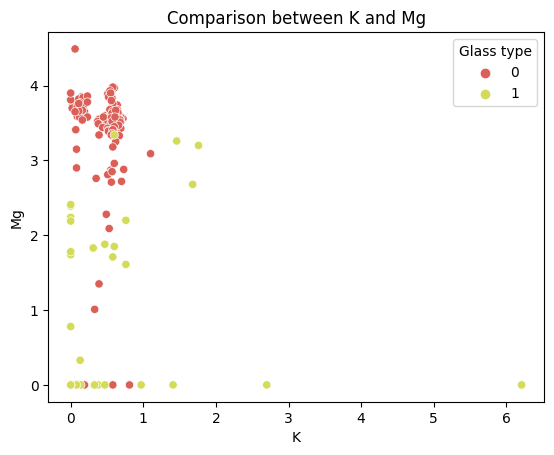

In [46]:
# Comparing Mg and K
sns.scatterplot(x='K', y='Mg', hue='Glass type', data = df)
plt.title('Comparison between K and Mg')
plt.show()

The correlation between K and Mg is moderately positive.

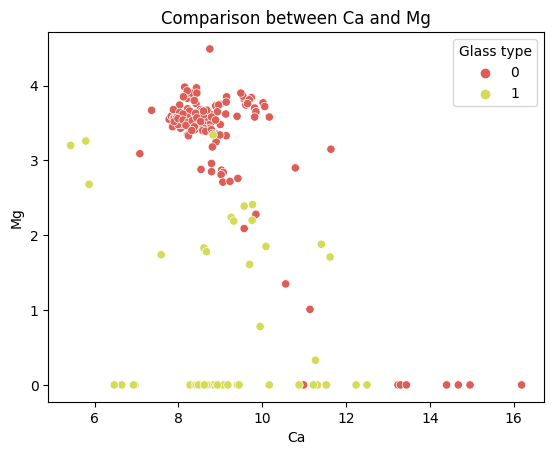

In [47]:
# Comparing Mg and Ca
sns.scatterplot(x='Ca', y='Mg', hue='Glass type', data = df)
plt.title('Comparison between Ca and Mg')
plt.show()

Correlation between Ca and Mg is moderately negative.

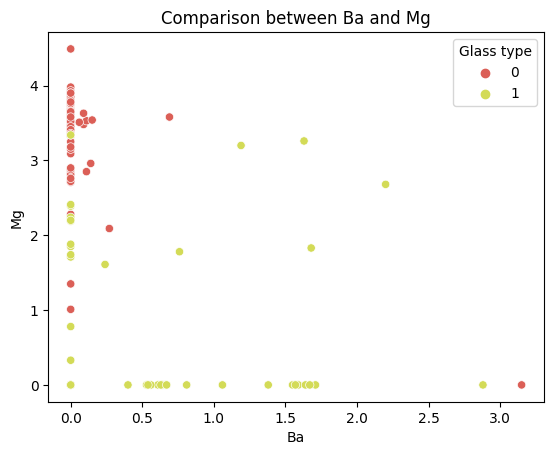

In [48]:
# Comparing Mg and Ba
sns.scatterplot(x='Ba', y='Mg', hue='Glass type', data = df)
plt.title('Comparison between Ba and Mg')
plt.show()

Ba and Mg has a moderately negative correlation.

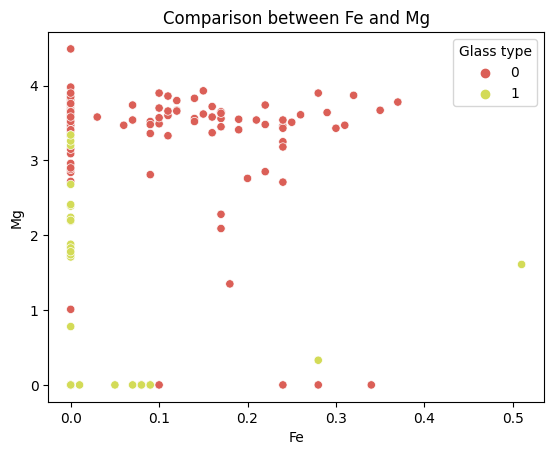

In [49]:
# Comparing Mg and Fe
sns.scatterplot(x='Fe', y='Mg', hue='Glass type', data = df)
plt.title('Comparison between Fe and Mg')
plt.show()

Fe and Mg have a very weak positive relationship.

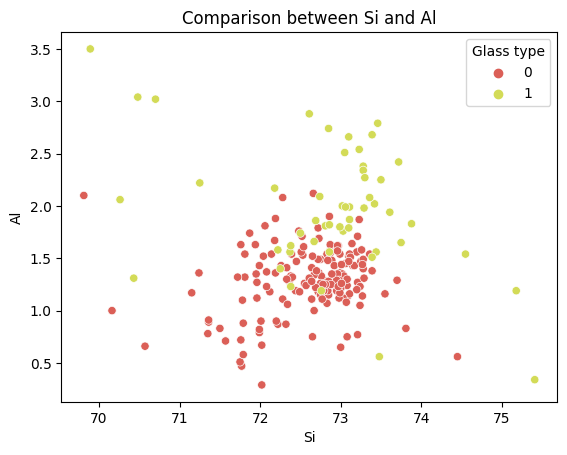

In [50]:
# Comparing Al and Si
sns.scatterplot(x='Si', y='Al', hue='Glass type', data = df)
plt.title('Comparison between Si and Al')
plt.show()

Moderately positive relationship is observed between Si and Al.

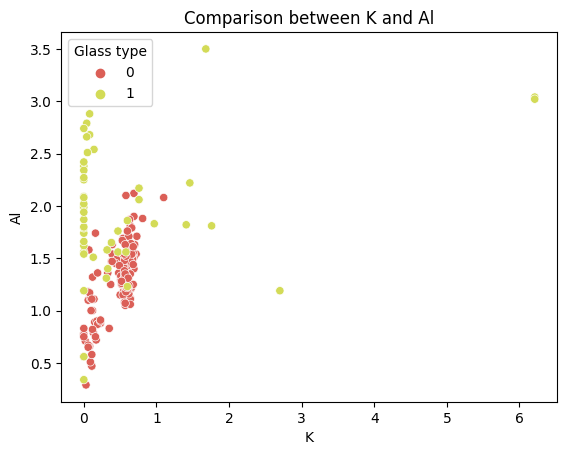

In [51]:
# Comparing Al and K
sns.scatterplot(x='K', y='Al', hue='Glass type', data = df)
plt.title('Comparison between K and Al')
plt.show()

There seems to be no correlation between K and Al.

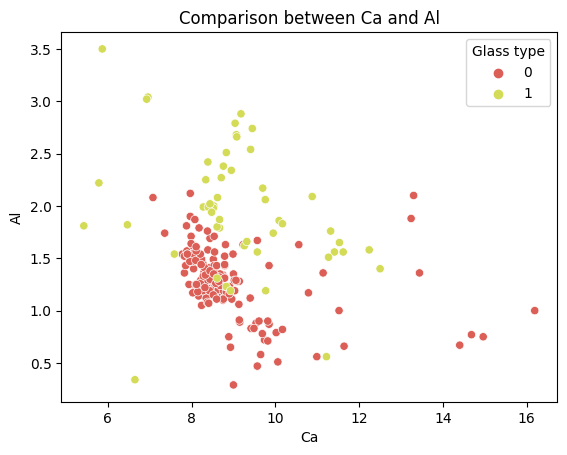

In [52]:
# Comparing Al and Ca
sns.scatterplot(x='Ca', y='Al', hue='Glass type', data = df)
plt.title('Comparison between Ca and Al')
plt.show()

A weak neative correlation is observed between Ca and Al.

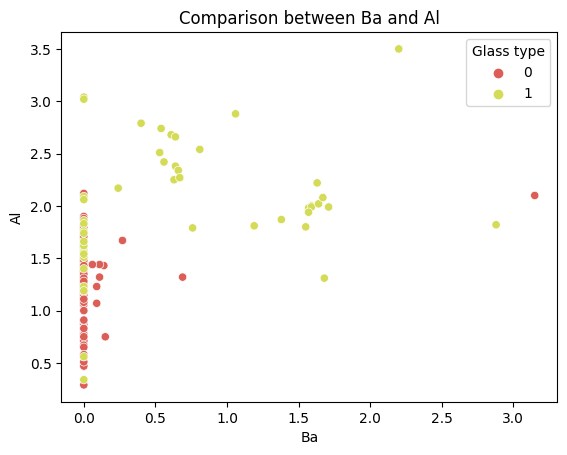

In [53]:
# Comparing Al and Ba
sns.scatterplot(x='Ba', y='Al', hue='Glass type', data = df)
plt.title('Comparison between Ba and Al')
plt.show()

Ba and Al have a moderately positive correlation.

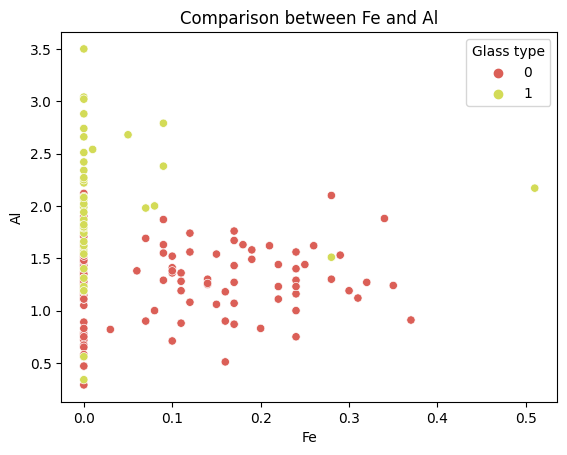

In [54]:
# Comparing Al and Fe
sns.scatterplot(x='Fe', y='Al', hue='Glass type', data = df)
plt.title('Comparison between Fe and Al')
plt.show()

Fe and Al seems to have no correlation.

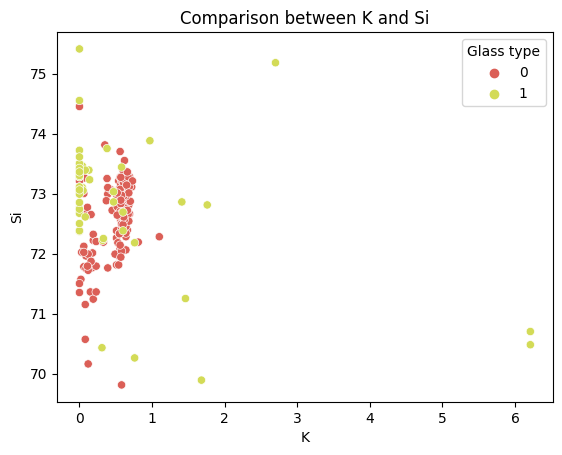

In [55]:
# Comparing Si and K
sns.scatterplot(x='K', y='Si', hue='Glass type', data = df)
plt.title('Comparison between K and Si')
plt.show()

There seems to be almost no correlation between K and Si.

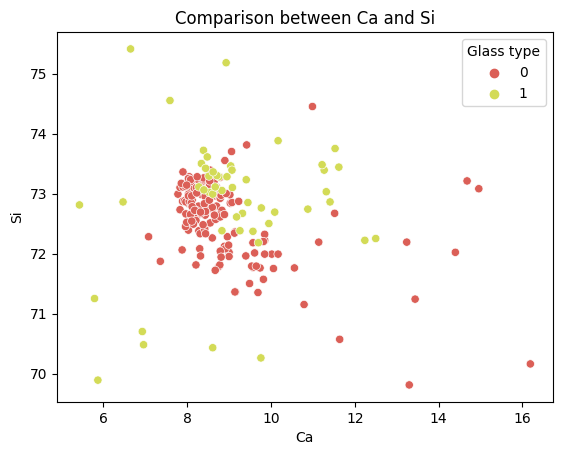

In [56]:
# Comparing Si and Ca
sns.scatterplot(x='Ca', y='Si', hue='Glass type', data = df)
plt.title('Comparison between Ca and Si')
plt.show()

A very weak negative correlation is observed between Ca and Si.

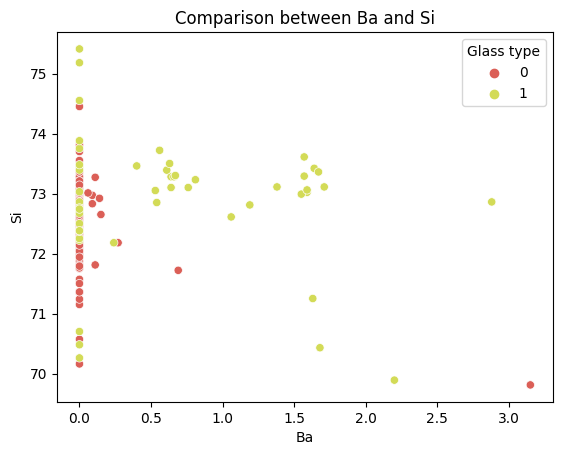

In [57]:
# Comparing Si and Ba
sns.scatterplot(x='Ba', y='Si', hue='Glass type', data = df)
plt.title('Comparison between Ba and Si')
plt.show()

A very weak positive correlation is observed between Ba and Si.

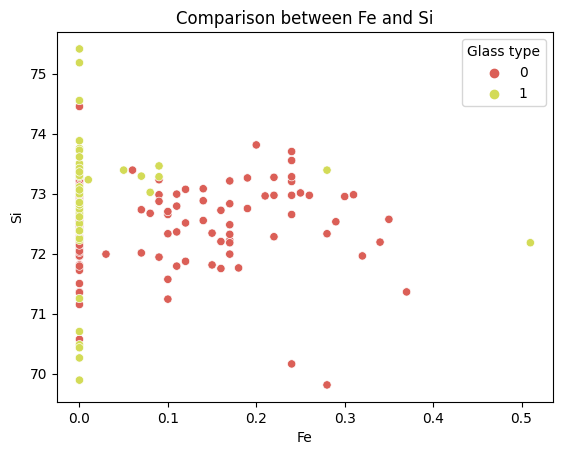

In [58]:
# Comparing Si and Fe
sns.scatterplot(x='Fe', y='Si', hue='Glass type', data = df)
plt.title('Comparison between Fe and Si')
plt.show()

No correlation is observed between Fe and Si.

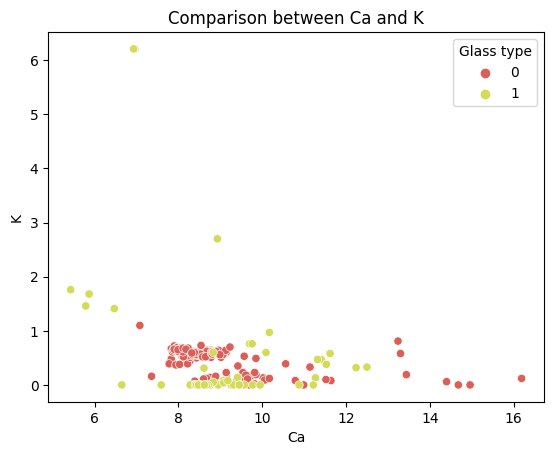

In [59]:
# Comparing K and Ca
sns.scatterplot(x='Ca', y='K', hue='Glass type', data = df)
plt.title('Comparison between Ca and K')
plt.show()

There is a moderately negative correlation between Ca and K.

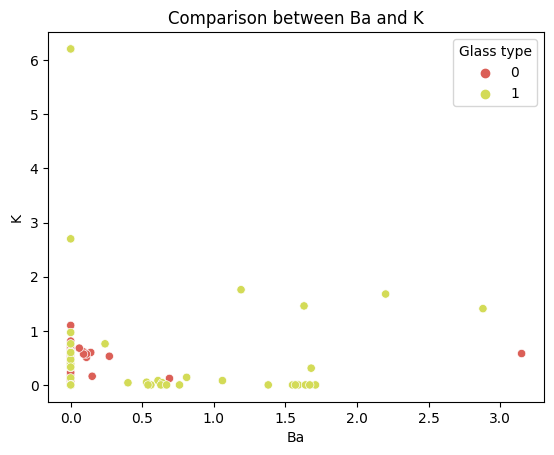

In [60]:
# Comparing K and Ba
sns.scatterplot(x='Ba', y='K', hue='Glass type', data = df)
plt.title('Comparison between Ba and K')
plt.show()

A moderately negative correlation is observed between Ba and K.

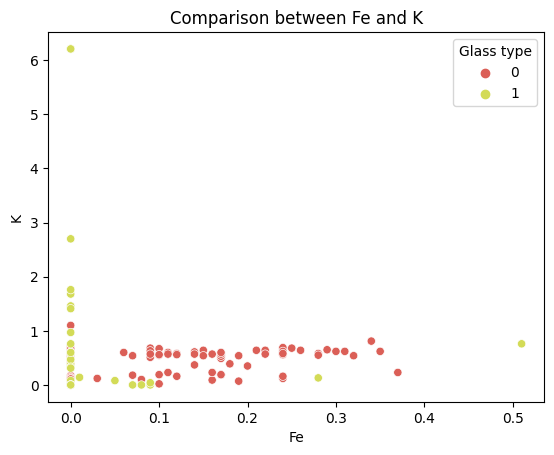

In [61]:
# Comparing K and Fe
sns.scatterplot(x='Fe', y='K', hue='Glass type', data = df)
plt.title('Comparison between Fe and K')
plt.show()

No correlation is observed between Fe and K.

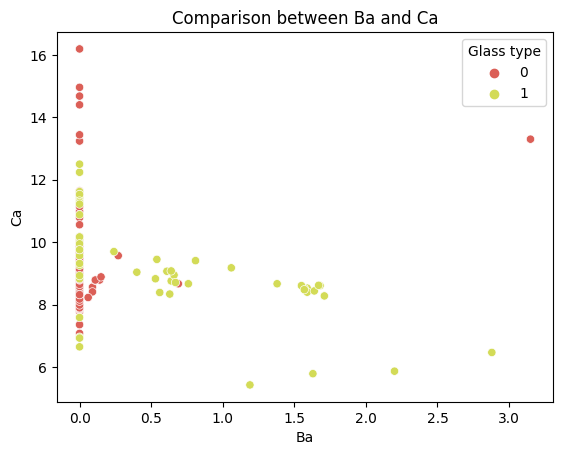

In [62]:
# Comparing Ca and Ba
sns.scatterplot(x='Ba', y='Ca', hue='Glass type', data = df)
plt.title('Comparison between Ba and Ca')
plt.show()

A very weak negative correlation is observed between Ba and Ca.

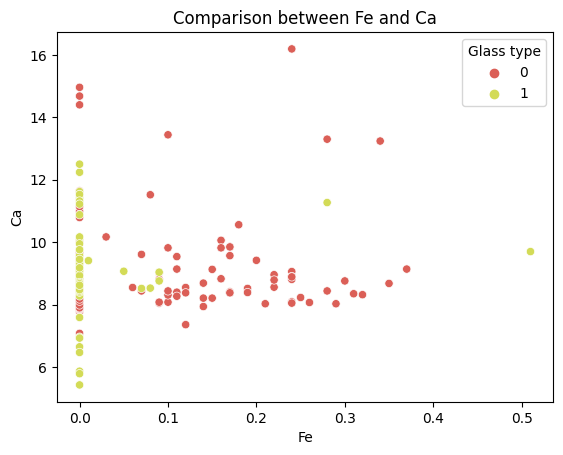

In [63]:
# Comparing Ca and Fe
sns.scatterplot(x='Fe', y='Ca', hue='Glass type', data = df)
plt.title('Comparison between Fe and Ca')
plt.show()

No correlation between Fe and Ca.

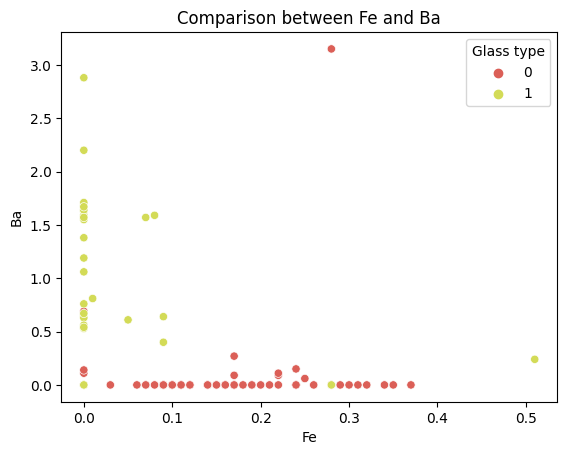

In [64]:
# Comparing Ba and Fe
sns.scatterplot(x='Fe', y='Ba', hue='Glass type', data = df)
plt.title('Comparison between Fe and Ba')
plt.show()

No correlation is observed between Fe and Ba.

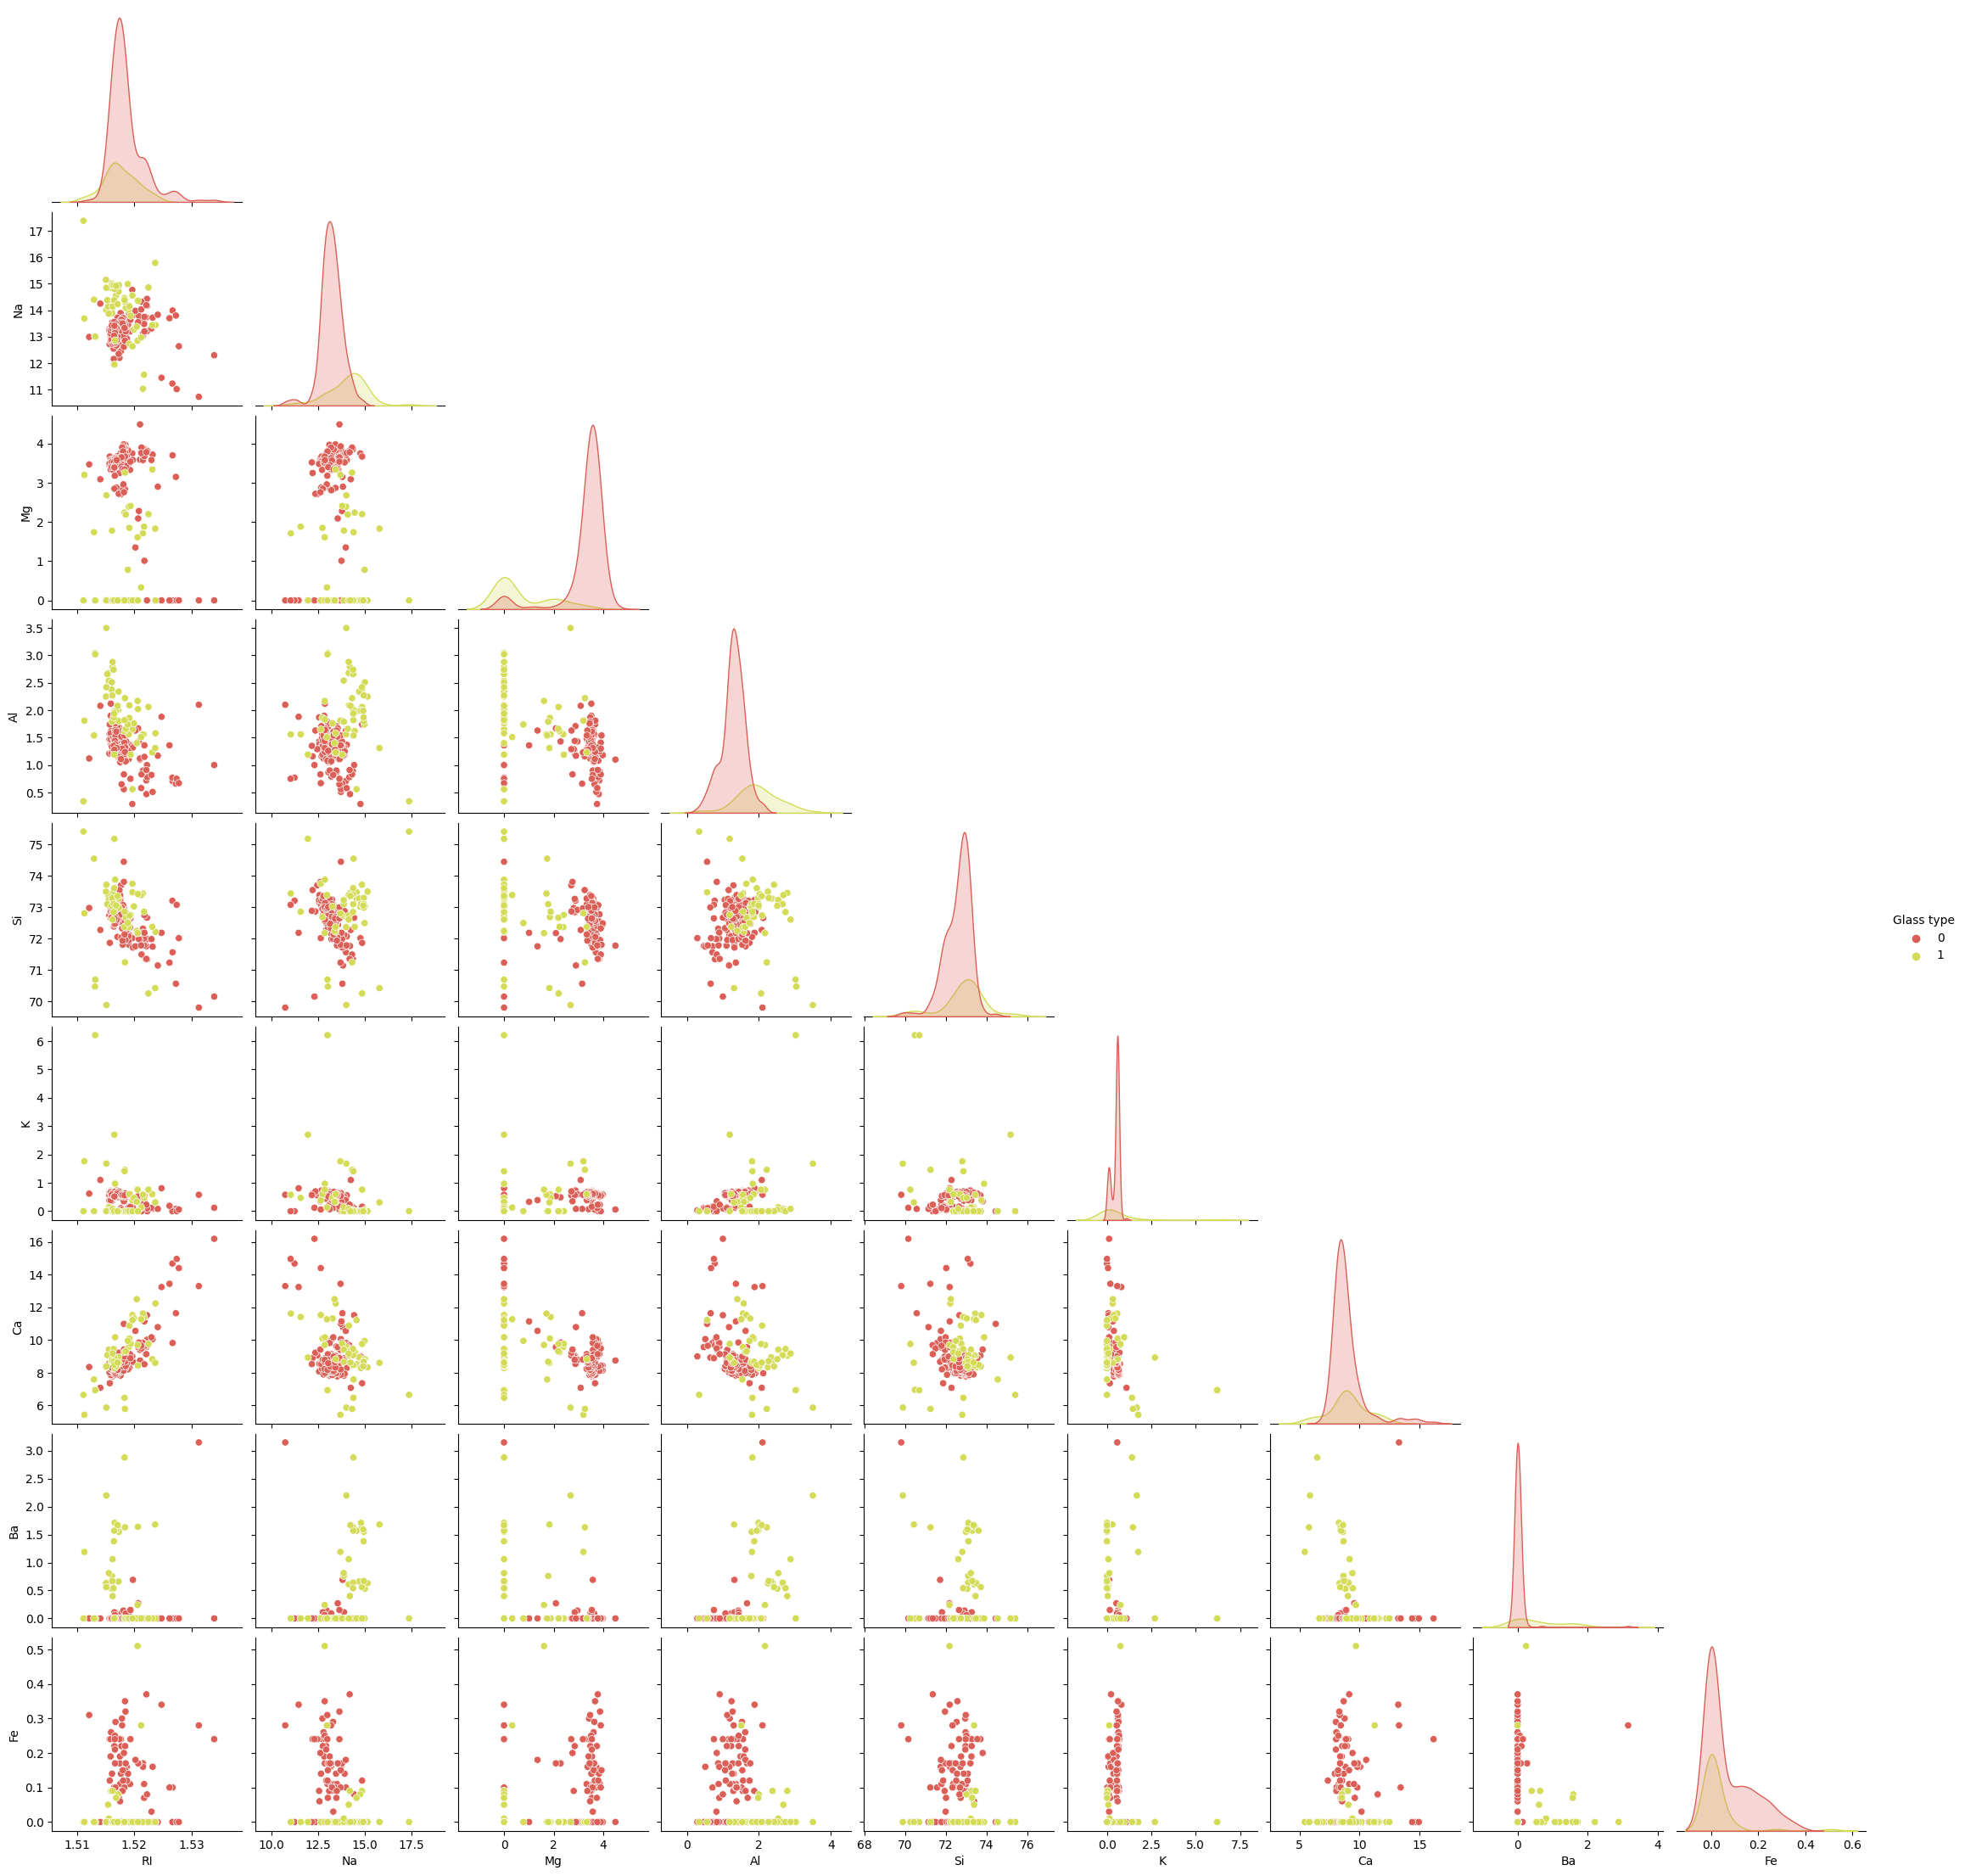

In [65]:
# Pairwise relation between variables with respect to the Glass type
sns.pairplot(df.drop(columns='Id number'), hue='Glass type', corner = True)
plt.show()

- Most of the relationships that exist in the datatset are weak.
- There is a negative correlation between RI and Al, RI and SI, Na and Al, Na and Si.
- There is a positive correlation between RI and Ca.

### Checking for outliers

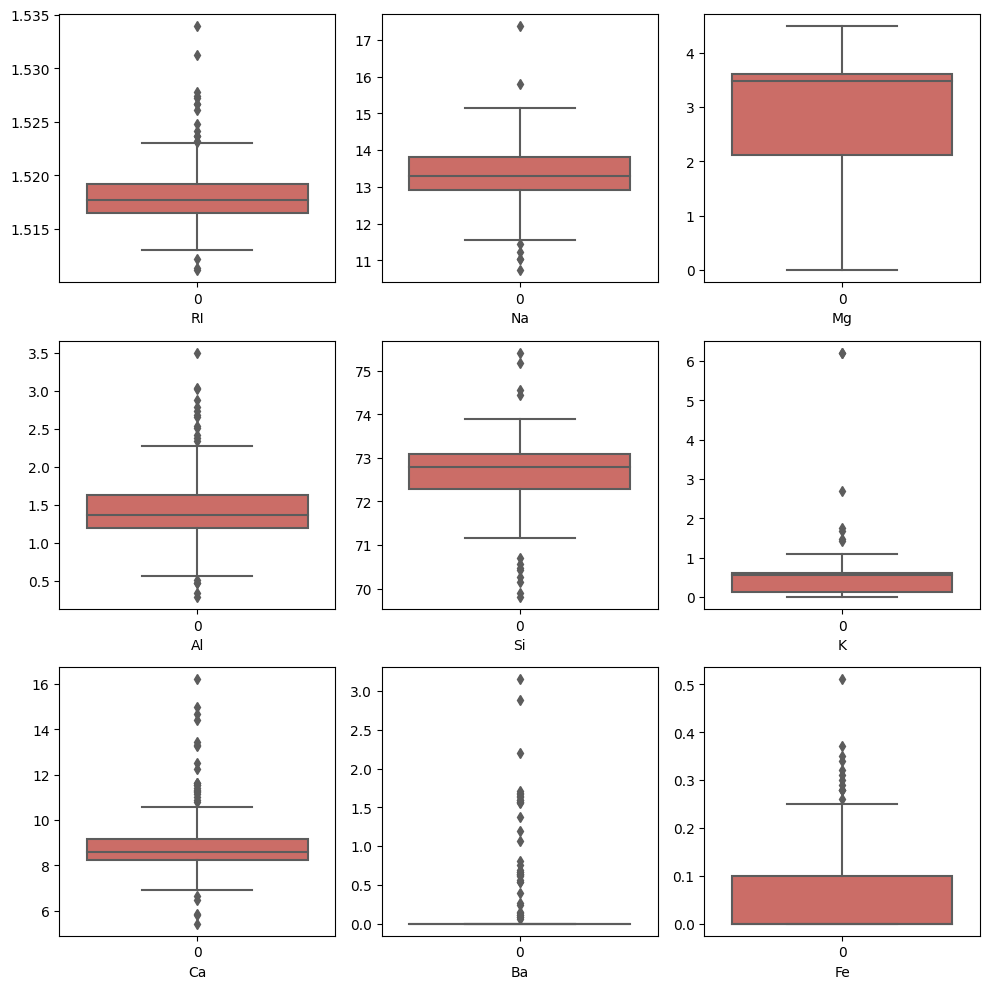

In [66]:
# Checking for outliers using boxplot
plt.figure(figsize=(10, 10))
plot_num = 1
for col in num_cols:
    if plot_num <= 9:
        ax = plt.subplot(3, 3, plot_num)
        sns.boxplot(df[col])
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

There are quite a lot of outliers visible from the boxplots. Apart from Mg, all other variables have outliers that need to be removed. <br>
The outliers can be removed by using either z-score method or IQR method. The appropriate method will be chosen based on data loss percentage.

#### Z-score method

In [67]:
from scipy.stats import zscore

In [68]:
out_features = num_cols.drop(columns='Mg')
z = np.abs(zscore(out_features))
z

,RI,Na,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,0.692442,1.127082,0.671705,0.145766,0.352877,0.586451
1,0.249333,0.591817,0.170460,0.102319,0.026213,0.793734,0.352877,0.586451
2,0.721318,0.149933,0.190912,0.438787,0.164533,0.828949,0.352877,0.586451
3,0.232831,0.242853,0.310994,0.052974,0.112107,0.519052,0.352877,0.586451
4,0.312045,0.169205,0.411375,0.555256,0.081369,0.624699,0.352877,0.586451
...,...,...,...,...,...,...,...,...
209,0.704815,0.898681,2.881125,0.052974,0.640968,0.157088,1.783978,0.586451
210,0.500178,1.856097,1.094342,0.529374,0.763919,0.392276,2.852405,0.586451
211,0.754046,1.168721,1.154570,0.995252,0.763919,0.364103,2.953200,0.586451
212,0.612399,1.193270,0.993960,1.241133,0.763919,0.335931,2.812087,0.586451


In [69]:
# Removing data where z-score is above 3 (threshold value) for normal distribution
df_z = df[(z<3).all(axis=1)]
df_z.shape

(194, 11)

In [70]:
# Data loss percentage
old = df.shape[0]
new_z = df_z.shape[0]

(old - new_z)/old * 100

9.345794392523365

The data loss percentage is 9.35, which is less then 10 (acceptable value).

#### IQR method

In [71]:
q1 = out_features.quantile(0.25)
q3 = out_features.quantile(0.75)

iqr = q3 - q1

df_q = df[~((df < (q1 - 1.5*iqr))| (df > (q3 + 1.5*iqr))).any(axis=1)]

df_q.shape

(136, 11)

In [72]:
# Data loss percentage
old = df.shape[0]
new_q = df_q.shape[0]

(old - new_q)/old * 100

36.44859813084112

The data loss percentage is 36.45, which is greater than 10. So in this case, we will use the z-core method for outlier removal.

In [73]:
df = df_z

In [74]:
# Numerical columns from new dataframe
num_cols = df.drop(columns=['Id number', 'Glass type'])
num_cols.columns.to_list()

['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']

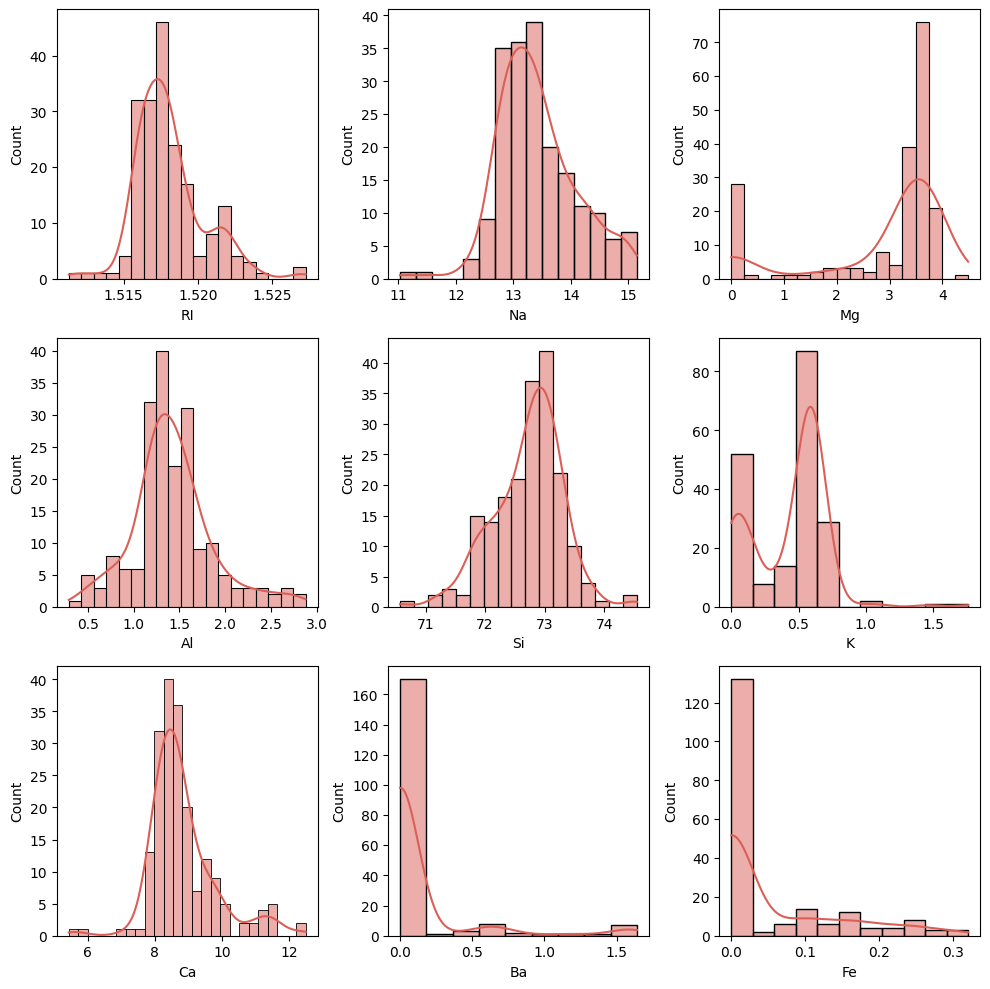

In [75]:
# Data distribution
plt.figure(figsize=(10, 10))
plot_num = 1
for col in num_cols:
    if plot_num <= 9:
        ax = plt.subplot(3, 3, plot_num)
        sns.histplot(df[col], kde=True)
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

After outlier removal, the data is more normalised as can be observed from the distributions.

### Data Preprocessing

In [76]:
# Dropping unnecessary columns
df.drop(columns='Id number', inplace=True)

Dropping the Id number column as it is nominal and does not provide any quantitative value.

In [77]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


### Checking for skewness

In [78]:
df.skew()

RI            0.952733
Na            0.371482
Mg           -1.528849
Al            0.658259
Si           -0.425450
K             0.303175
Ca            1.077962
Ba            3.188587
Fe            1.486479
Glass type    1.463837
dtype: float64

The acceptable skewness range is from -0.5 to 0.5. We need to remove skewness for rest of the columns.
- RI, Mg, Al, Ca, Ba, and Fe are all skewed.
- Since 'Glass type' is categorical and our target variable, the skewness need not be removed.

We will remove the skewness using transformation.

#### Removing skewness

In [79]:
#Importing extra libraries to remove skewness
from scipy import stats
from scipy import special

In [80]:
# Removing skewness
columns = ['RI', 'Mg', 'Al', 'Ca', 'Ba', 'Fe']

skew_transform = {}

for col in columns:
    transformed_log = np.log(df[col])                        # Log Transformation
    transformed_boxcox = special.boxcox1p(df[col], 0.15)     # Box-Cox Transformation with lambda=0.15
    transformed_inverse = 1 / df[col]                        # Inverse Transformation
    transformed_yeojohnson, _ = stats.yeojohnson(df[col])    # Yeo-Johnson Transformation
    transformed_cbrt = np.cbrt(df[col])                      # Cube Root Transformation
    transformed_sqrt = np.sqrt(df[col])                      # Square Root Transformation

    # Creating a dictionary for the skewness values of each transformation
    transformed_skew = {
        "Log Transformation": stats.skew(transformed_log),
        "Box-Cox Transformation": stats.skew(transformed_boxcox),
        "Inverse Transformation": stats.skew(transformed_inverse),
        "Yeo Johnson Transformation": stats.skew(transformed_yeojohnson),
        "Cube Root Transformation": stats.skew(transformed_cbrt),
        "Square Root Transformation": stats.skew(transformed_sqrt)}

    # Storing the transformation skewness values for the column
    skew_transform[col] = transformed_skew

In [81]:
skew_transform_df = pd.DataFrame.from_dict(skew_transform)
skew_transform_df

,RI,Mg,Al,Ca,Ba,Fe
Log Transformation,0.938373,NaN,-0.982420,0.333948,NaN,NaN
Box-Cox Transformation,0.941774,-1.713948,-0.040696,0.534761,2.854489,1.405232
Inverse Transformation,-0.931398,NaN,3.473353,0.706698,NaN,NaN
Yeo Johnson Transformation,NaN,-1.018059,0.013933,-0.081105,1.955951,0.852201
Cube Root Transformation,0.940699,-1.884335,-0.372072,0.607172,2.190488,0.876323
Square Root Transformation,0.941862,-1.784839,-0.093993,0.732443,2.445912,1.000075


None of these transformation methods is giving us skewness value within -0.5 to 0.5, which is extremely normal distribution. So in this case we will consider -1 to 1 as the acceptable range which is moderately normal.<br>
We will use Yeo Johnson Transformation	for all values except RI. For RI, we will use log transformation.

In [82]:
# Transforming using YeoJohnson
for col in ['Mg', 'Al', 'Ca', 'Ba', 'Fe']:
    transformed_col, _ = stats.yeojohnson(df[col])
    df[col] = transformed_col

In [83]:
# Transforming using Log
transformed_col = np.log(df['RI'])
df['RI'] = transformed_col

In [84]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass type
0,0.419375,13.64,46.729956,0.804433,71.78,0.06,1.220767,-0.0,-0.0,0
1,0.417137,13.89,27.920870,0.943093,72.73,0.48,1.195812,-0.0,-0.0,0
2,0.416194,13.53,27.043849,1.032212,72.99,0.39,1.194335,-0.0,-0.0,0
3,0.417170,13.21,29.545345,0.906991,72.61,0.57,1.206882,-0.0,-0.0,0
4,0.417012,13.27,28.276748,0.880670,73.08,0.55,1.202716,-0.0,-0.0,0


These are the transformed values. Lets check the skewness and observe the distribution.

In [85]:
df.skew()

RI            0.945701
Na            0.371482
Mg           -1.026009
Al            0.014042
Si           -0.425450
K             0.303175
Ca           -0.081738
Ba            1.971225
Fe            0.858856
Glass type    1.463837
dtype: float64

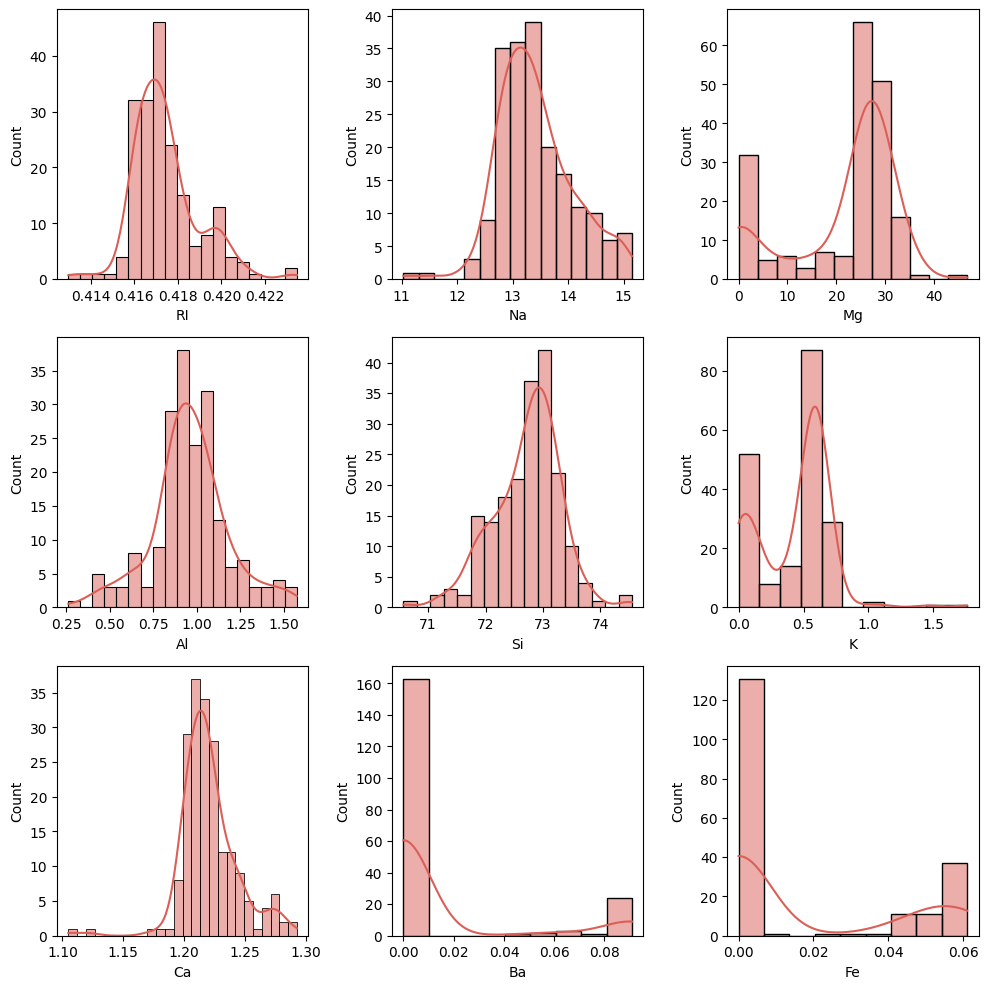

In [86]:
# Data distribution
plt.figure(figsize=(10, 10))
plot_num = 1
for col in num_cols:
    if plot_num <= 9:
        ax = plt.subplot(3, 3, plot_num)
        sns.histplot(df[col], kde=True)
        plt.xlabel(col, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plot_num+=1
plt.tight_layout()

Now, the skewness has been reduced to a certain extent, and the variables seem more normalised.

### Correlation analysis

In [87]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass type
RI,1.000000,0.050556,0.064316,-0.545599,-0.608867,-0.368230,0.683250,-0.227442,0.025171,-0.060559
Na,0.050556,1.000000,-0.409922,0.191347,-0.234718,-0.612183,0.013539,0.529551,-0.155900,0.463723
Mg,0.064316,-0.409922,1.000000,-0.555727,-0.395402,0.416613,-0.421808,-0.568588,0.102689,-0.826772
Al,-0.545599,0.191347,-0.555727,1.000000,0.347749,0.069369,-0.262084,0.555390,-0.082697,0.563197
Si,-0.608867,-0.234718,-0.395402,0.347749,1.000000,0.072579,-0.149545,0.187263,-0.006004,0.282746
K,-0.368230,-0.612183,0.416613,0.069369,0.072579,1.000000,-0.555105,-0.303226,0.052508,-0.396495
Ca,0.683250,0.013539,-0.421808,-0.262084,-0.149545,-0.555105,1.000000,-0.127969,0.022251,0.234952
Ba,-0.227442,0.529551,-0.568588,0.555390,0.187263,-0.303226,-0.127969,1.000000,-0.014902,0.598924
Fe,0.025171,-0.155900,0.102689,-0.082697,-0.006004,0.052508,0.022251,-0.014902,1.000000,-0.202450
Glass type,-0.060559,0.463723,-0.826772,0.563197,0.282746,-0.396495,0.234952,0.598924,-0.202450,1.000000


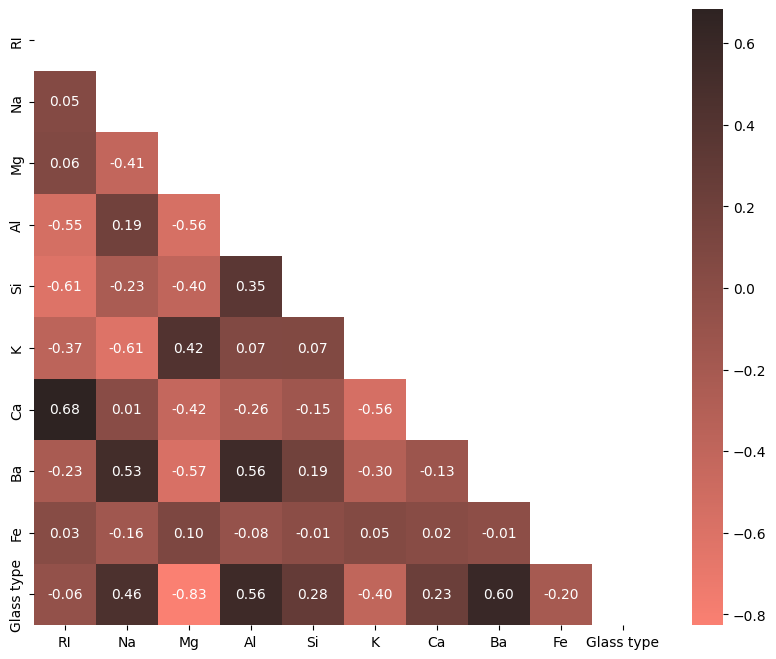

In [88]:
# Heatmap for correlation analysis
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 8))
palette = sns.color_palette("dark:salmon_r", as_cmap=True)
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap=palette, mask=mask)
plt.show()

- There is a high negative correlation between Mg and Glass type.
- There is a moderate positive correlation between RI and Ca, Al and Glass type, Ba and Glass type, and Ba and Al.
- There is a moderate negative correlation between Ba and Mg, Ca and K, Al and Mg, and Al and RI.
- Rest all relationships are weak.

In [89]:
df.corr()['Glass type'].sort_values(ascending=False)

Glass type    1.000000
Ba            0.598924
Al            0.563197
Na            0.463723
Si            0.282746
Ca            0.234952
RI           -0.060559
Fe           -0.202450
K            -0.396495
Mg           -0.826772
Name: Glass type, dtype: float64

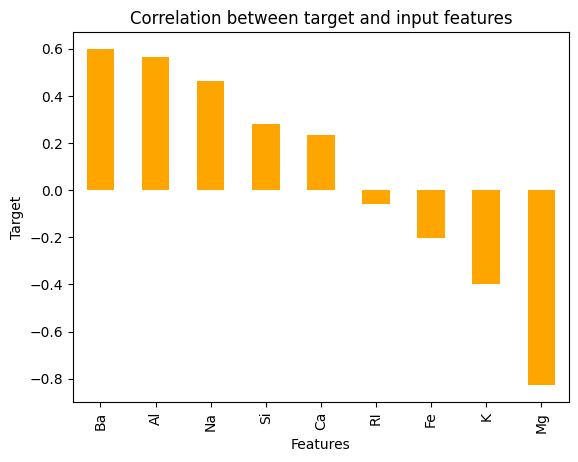

In [90]:
# Visualising the correlation between target and input features
df.corr()['Glass type'].sort_values(ascending=False).drop(['Glass type']).plot(kind='bar', color='orange')
plt.title('Correlation between target and input features')
plt.xlabel('Features')
plt.ylabel('Target')
plt.show()

Mg, Al, and Ba have the highest correlation with Glass type.

### Separating features and target

In [91]:
x = df.drop('Glass type', axis=1)
y = df['Glass type']

#### Feature scaling

In [92]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.292192,0.332127,2.295067,-0.705895,-1.612464,-1.319609,0.001118,-0.429499,-0.677737
1,-0.197250,0.704398,0.587338,-0.073256,0.016082,0.172091,-1.057157,-0.429499,-0.677737
2,-0.824689,0.168328,0.507711,0.333353,0.461790,-0.147559,-1.119780,-0.429499,-0.677737
3,-0.175322,-0.308179,0.734829,-0.237973,-0.189629,0.491741,-0.587678,-0.429499,-0.677737
4,-0.280582,-0.218834,0.619650,-0.358065,0.616073,0.420708,-0.764376,-0.429499,-0.677737


### Checking Variance Inflation Factor (VIF)

In [93]:
# Checking for multicollinearity using Variance Inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_values = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif = pd.DataFrame({'Features': x.columns, 'VIF': vif_values})
vif

,Features,VIF
0,RI,4.861976
1,Na,7.123179
2,Mg,11.916217
3,Al,3.899616
4,Si,5.421624
5,K,5.366771
6,Ca,10.819535
7,Ba,2.698828
8,Fe,1.058247


VIF of 5 or more means there is multicollinearity. From above Na, Mg, and Ca have VIF value higher than 5. The highest value is for Mg, so we will drop the column first. Mg has high collinearity with the other variables.

In [94]:
x.drop(columns='Mg', inplace=True)

In [95]:
vif_values = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif = pd.DataFrame({'Features': x.columns, 'VIF': vif_values})
vif

,Features,VIF
0,RI,4.815008
1,Na,3.249636
2,Al,2.190329
3,Si,2.587342
4,K,3.541307
5,Ca,3.450301
6,Ba,2.230028
7,Fe,1.055109


Now the VIF values are all within range.

### Model building

#### Splitting data into Training and Testing

In [96]:
# Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [97]:
# Finding the best random state for splitting the data
max_accu = 0
max_rs = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                        test_size=0.3,
                                                        random_state=i,
                                                        stratify=y
                                                       )
    # The split should be stratified so that y samples for both classes are equally represented in training and test data
    lr = LogisticRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    accu = accuracy_score(y_test, y_pred)
    if accu > max_accu:
        max_accu = accu
        max_rs = i
        
print(f'Best accuracy: {max_accu}\nRandom state for best accuracy: {max_rs}')

Best accuracy: 1.0
Random state for best accuracy: 185


In [98]:
# Splitting into train-test data using best random state
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.3,
                                                    random_state=max_rs,
                                                    stratify=y
                                                   )

#### Handling Class imbalance

In [99]:
y_train.value_counts()

0    107
1     28
Name: Glass type, dtype: int64

There is a huge imbalance in the training data, which can affect the accuracy of the clasification model. This issue can be resolved by oversampling (creating new data for the class with less number of values).<br>

Oversampling is done after splitting the data so that we don't create any new data for testing the model.

#### Oversampling using SMOTE

In [100]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42) # choosing random state for reproducible results
x1, y1 = sm.fit_resample(x_train, y_train)

In [101]:
y1.value_counts()

0    107
1    107
Name: Glass type, dtype: int64

The imbalance has now been resolved by oversampling.

#### Classification Models

In [102]:
# Importing several Classification models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
import catboost
import xgboost

# Importing model evaluation metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [103]:
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Support Vector Classifier', SVC()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Extra Trees', ExtraTreesClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('XGBoost', xgboost.XGBClassifier()),
    ('CatBoost', catboost.CatBoostClassifier(verbose=0))
]

accuracies = []
confusion_matrices = []
classification_reports = []

for model_name, model in models:
    
    model.fit(x1, y1)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    accuracies.append((model_name, accuracy))
    confusion_matrices.append((model_name, cm))
    classification_reports.append((model_name, cr))

df_results = pd.DataFrame(accuracies, columns=['Model', 'Accuracy'])
df_results.sort_values('Accuracy', ascending=False, inplace=True)

df_results

,Model,Accuracy
4,Random Forest,1.000000
0,Logistic Regression,0.983051
1,Support Vector Classifier,0.983051
2,KNN,0.983051
5,Extra Trees,0.983051
8,XGBoost,0.983051
7,Gradient Boosting,0.966102
9,CatBoost,0.966102
6,AdaBoost,0.949153
3,Decision Tree,0.915254


From the above, we observe that Logistic Regression, SVC, KNN, Extra Trees, XGBoost all perform the same on the test data with 98.3% accuracy.<br>
Random forest is the best performing model with 100% accuracy.

#### Confusion matrices

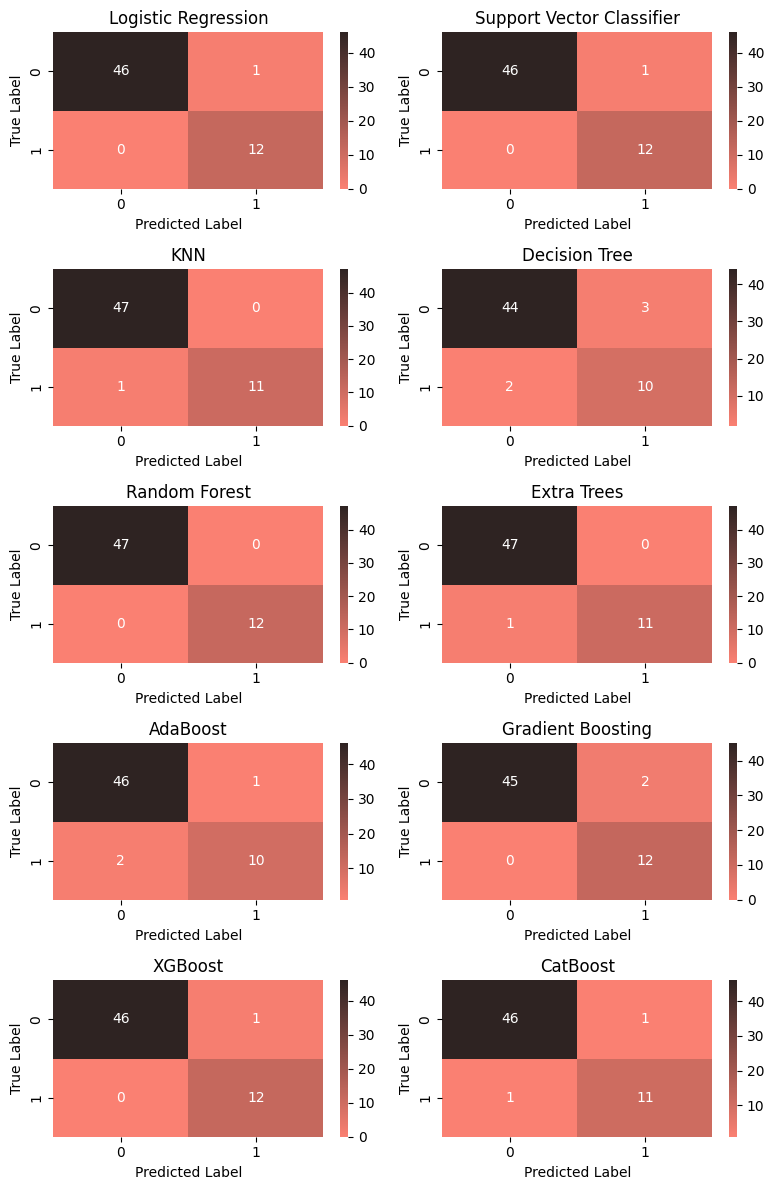

In [104]:
plt.figure(figsize=(8, 12))
for i, (model_name, cm) in enumerate(confusion_matrices, 1):
    plt.subplot(5, 2, i)
    plt.title(model_name)
    sns.heatmap(cm, annot=True, fmt='d', cmap=palette)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
plt.tight_layout()
plt.show()

#### Classification reports

In [105]:
for model_name, cr in classification_reports:
    print(model_name)
    print(cr)
    print('-'*60)

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        47
           1       0.92      1.00      0.96        12

    accuracy                           0.98        59
   macro avg       0.96      0.99      0.97        59
weighted avg       0.98      0.98      0.98        59

------------------------------------------------------------
Support Vector Classifier
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        47
           1       0.92      1.00      0.96        12

    accuracy                           0.98        59
   macro avg       0.96      0.99      0.97        59
weighted avg       0.98      0.98      0.98        59

------------------------------------------------------------
KNN
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        47
           1       1.00      0.92      0.96        12

    accura

For SVC model, both precision and recall values are high along with accuracy.

#### Using Cross Validation

In [106]:
from sklearn.model_selection import cross_val_score

In [107]:
accuracies = []

for model_name, model in models:
    cv_score = cross_val_score(model, x1, y1, cv=5) # Using fold value of 5
    mean_accuracy = cv_score.mean()
    
    model.fit(x1, y1)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    diff = abs(accuracy - mean_accuracy)
    
    accuracies.append((model_name, mean_accuracy, accuracy, diff))

df_results = pd.DataFrame(accuracies, columns=['Model', 'CV Accuracy', 'Accuracy', 'Difference'])
df_results.sort_values('Difference', ascending=True, inplace=True)

df_results

,Model,CV Accuracy,Accuracy,Difference
1,Support Vector Classifier,0.981174,0.983051,0.001877
5,Extra Trees,0.990476,0.983051,0.007425
4,Random Forest,0.976523,0.966102,0.010421
8,XGBoost,0.971982,0.983051,0.011069
9,CatBoost,0.981174,0.966102,0.015072
7,Gradient Boosting,0.967110,0.949153,0.017957
2,KNN,0.957918,0.983051,0.025133
6,AdaBoost,0.976744,0.949153,0.027592
3,Decision Tree,0.943854,0.915254,0.028600
0,Logistic Regression,0.953156,0.983051,0.029895


The least overfitting model is Support Vector Classifier. The difference between cross-validation accuracy and test accuracy is the least for this model.

#### Hyperparameter Tuning

In [108]:
from sklearn.model_selection import GridSearchCV

##### Logistic Regression

In [109]:
params = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter': [1, 2, 5, 7, 10]
    }

In [110]:
gcv = GridSearchCV(LogisticRegression(), params, cv=5, scoring='accuracy')
gcv.fit(x1, y1)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [1, 2, 5, 7, 10],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [111]:
best_params = gcv.best_params_
best_params

{'C': 1.623776739188721,
 'max_iter': 10,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [112]:
model_lr = LogisticRegression(**best_params)
model_lr.fit(x1, y1)
y_pred_lr = model_lr.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(accuracy_lr)

0.9830508474576272


##### Support Vector Classifier

In [113]:
params = {
    'kernel': ['rbf', 'poly'],
    'C': np.logspace(-4, 4, 20),
    'gamma': np.logspace(-4, 4, 20)
    }

In [114]:
gcv = GridSearchCV(SVC(), params, cv=5, scoring='accuracy')
gcv.fit(x1, y1)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.000000...
                         'gamma': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy')

In [115]:
best_params = gcv.best_params_
best_params

{'C': 29.763514416313132, 'gamma': 0.012742749857031334, 'kernel': 'rbf'}

In [116]:
model_sv = SVC(**best_params)
model_sv.fit(x1, y1)
y_pred_sv = model_sv.predict(x_test)
accuracy_sv = accuracy_score(y_test, y_pred_sv)
print(accuracy_sv)

0.9661016949152542


##### XGBoost

In [117]:
params = {
    'max_depth': [1, 2, 5, 7, 10, 50],
    'learning_rate': [0.001, 0.01, 0.1, 1.0],
    'subsample': [0.2, 0.5, 0.7, 1],
    'n_estimators': [10, 50, 100, 200]
    }

In [118]:
gcv = GridSearchCV(xgboost.XGBClassifier(), params, cv=5, scoring='accuracy')
gcv.fit(x1, y1)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0],
                         'max_depth': [1, 2, 5, 7, 10, 50],
                         'n_estimators': [10, 50, 100, 200],
                         'subsample': [0.2, 0.5, 0.7, 1]},
             scoring='accuracy')

In [119]:
best_params = gcv.best_params_
best_params

{'learning_rate': 1.0, 'max_depth': 1, 'n_estimators': 100, 'subsample': 1}

In [120]:
model_xg = xgboost.XGBClassifier(**best_params)
model_xg.fit(x1, y1)
y_pred_xg = model_xg.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)
print(accuracy_xg)

0.9661016949152542


##### AdaBoost

In [121]:
params = {
    'random_state': [0, 5, 10, 15, 20, 25],
    'n_estimators': [100, 500, 700, 1000],
    'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0]
}

In [122]:
gcv = GridSearchCV(AdaBoostClassifier(), params, cv=5, scoring='accuracy')
gcv.fit(x1, y1)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0],
                         'n_estimators': [100, 500, 700, 1000],
                         'random_state': [0, 5, 10, 15, 20, 25]},
             scoring='accuracy')

In [123]:
best_params = gcv.best_params_
best_params

{'learning_rate': 0.1, 'n_estimators': 700, 'random_state': 0}

In [124]:
model_ad = AdaBoostClassifier(**best_params)
model_ad.fit(x1, y1)
y_pred_ad = model_ad.predict(x_test)
accuracy_ad = accuracy_score(y_test, y_pred_ad)
print(accuracy_ad)

0.9661016949152542


##### Decision Tree

In [125]:
params = {
    'max_depth': [2, 3, 5, 10, 20, 25, 30, 50],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'criterion': ["gini", "entropy"]
    }

In [126]:
gcv = GridSearchCV(DecisionTreeClassifier(), params, cv=5, scoring='accuracy')
gcv.fit(x1, y1)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20, 25, 30, 50],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='accuracy')

In [127]:
best_params = gcv.best_params_
best_params

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1}

In [128]:
model_dt = DecisionTreeClassifier(**best_params)
model_dt.fit(x1, y1)
y_pred_dt = model_dt.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(accuracy_dt)

0.9152542372881356


##### Extra Trees

In [131]:
params = {
    'max_depth': [int(x) for x in np.linspace(10, 110, 11)],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ["gini", "entropy", "log_loss"],
    'n_estimators': [100, 500, 700, 1000],
    }

In [132]:
gcv = GridSearchCV(ExtraTreesClassifier(), params, cv=5, scoring='accuracy')
gcv.fit(x1, y1)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       110],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [100, 500, 700, 1000]},
             scoring='accuracy')

In [133]:
best_params = gcv.best_params_
best_params

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [134]:
model_et = ExtraTreesClassifier(**best_params)
model_et.fit(x1, y1)
y_pred_et = model_et.predict(x_test)
accuracy_et = accuracy_score(y_test, y_pred_et)
print(accuracy_et)

0.9830508474576272


##### Random Forest

In [135]:
params = {
    'max_depth': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False],
    'n_estimators': [int(x) for x in np.linspace(10, 110, num = 11)],
    'max_features': ['auto', 'sqrt']
    }

In [136]:
gcv = GridSearchCV(RandomForestClassifier(), params, cv=5, scoring='accuracy')
gcv.fit(x1, y1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [200, 400, 600, 800, 1000, 1200, 1400,
                                       1600, 1800, 2000],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110]},
             scoring='accuracy')

In [137]:
best_params = gcv.best_params_
best_params

{'bootstrap': False,
 'max_depth': 800,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 20}

In [138]:
model_rf = RandomForestClassifier(**best_params)
model_rf.fit(x1, y1)
y_pred_rf = model_rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(accuracy_rf)

0.9830508474576272


##### Gradient Boosting

In [139]:
params = {
    "n_estimators":[5, 50, 250, 500],
    "max_depth":[1, 3, 5, 7, 9],
    "learning_rate":[0.01, 0.1, 1, 10, 100]
    }

In [140]:
gcv = GridSearchCV(GradientBoostingClassifier(), params, cv=5, scoring='accuracy')
gcv.fit(x1, y1)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]},
             scoring='accuracy')

In [141]:
best_params = gcv.best_params_
best_params

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 250}

In [142]:
model_gb = GradientBoostingClassifier(**best_params)
model_gb.fit(x1, y1)
y_pred_gb = model_gb.predict(x_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(accuracy_gb)

0.9830508474576272


##### CatBoost

In [143]:
params = {
    'depth': [4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'iterations': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    }

In [144]:
gcv = GridSearchCV(catboost.CatBoostClassifier(verbose=0), params, cv=5, scoring='accuracy')
gcv.fit(x1, y1)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000015E817F8CD0>,
             param_grid={'depth': [4, 5, 6, 7, 8, 9, 10],
                         'iterations': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                        100],
                         'learning_rate': [0.001, 0.01, 0.1, 1]},
             scoring='accuracy')

In [145]:
best_params = gcv.best_params_
best_params

{'depth': 7, 'iterations': 80, 'learning_rate': 0.1}

In [146]:
model_cb = catboost.CatBoostClassifier(verbose=0, **best_params)
model_cb.fit(x1, y1)
y_pred_cb = model_cb.predict(x_test)
accuracy_cb = accuracy_score(y_test, y_pred_cb)
print(accuracy_cb)

0.9661016949152542


##### KNN

In [147]:
params = {
    'n_neighbors': [5, 7, 9, 11, 13, 15],
    'weights': ['uniform','distance'],
    'metric': ['minkowski','euclidean','manhattan']
    }

In [148]:
gcv = GridSearchCV(KNeighborsClassifier(), params, cv=5, scoring='accuracy')
gcv.fit(x1, y1)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [149]:
best_params = gcv.best_params_
best_params

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [150]:
model_knn = KNeighborsClassifier(**best_params)
model_knn.fit(x1, y1)
y_pred_knn = model_knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(accuracy_knn)

0.9830508474576272


#### Plotting ROC for each model

In [151]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

##### Logistic Regression

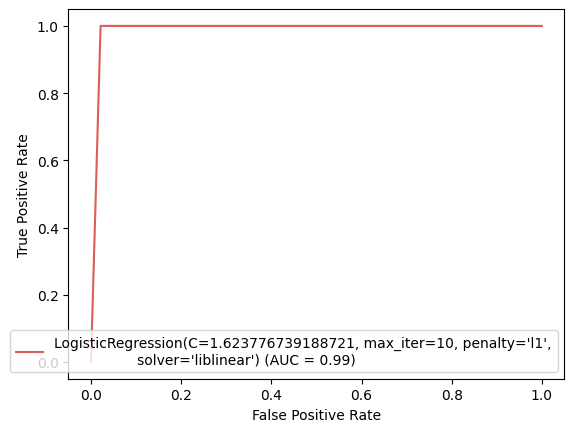

In [152]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_lr)
display.plot()

The AUC value for Logistic Regression is 0.99

##### Support Vector Classifier

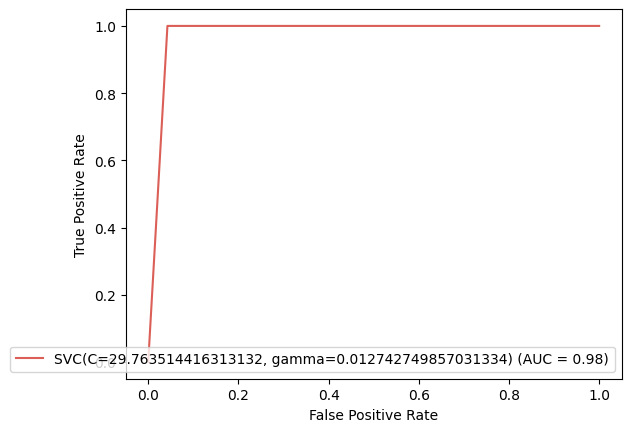

In [153]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_sv)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_sv)
display.plot()

The AUC value for SVC model is 0.98

##### XGBoost

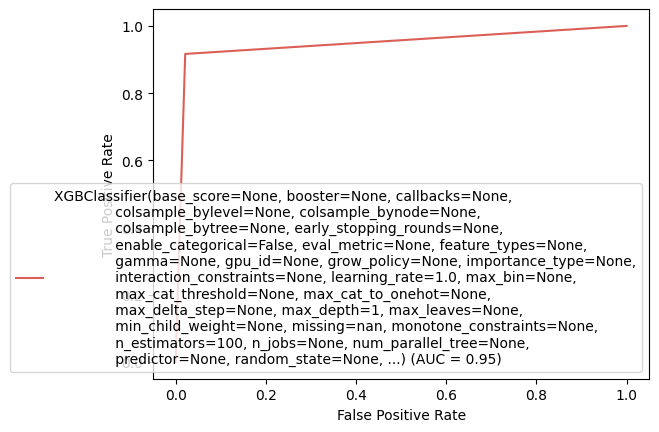

In [154]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xg)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_xg)
display.plot()

The AUC value is 0.95 for XGBoost model

##### AdaBoost

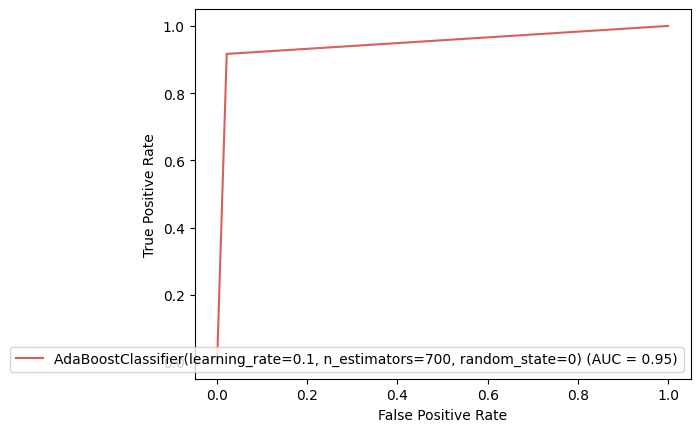

In [155]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ad)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_ad)
display.plot()

The AUC value for Adaboost model is 0.95

##### Decision Tree

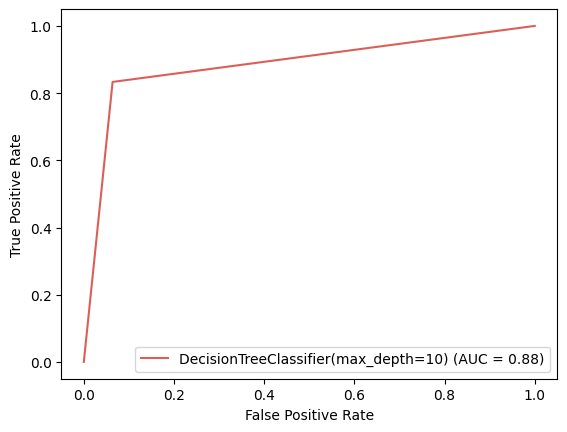

In [156]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_dt)
display.plot()

The AUC for Decision Tree model is 0.88

##### Extra Trees

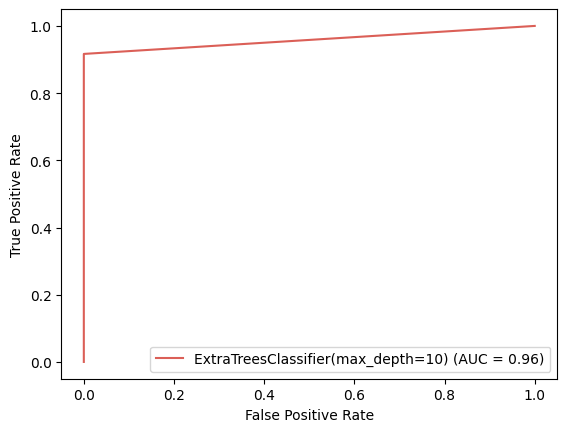

In [157]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_et)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_et)
display.plot()

The AUC for Extra Trees Classifier is 0.96

##### Random Forest

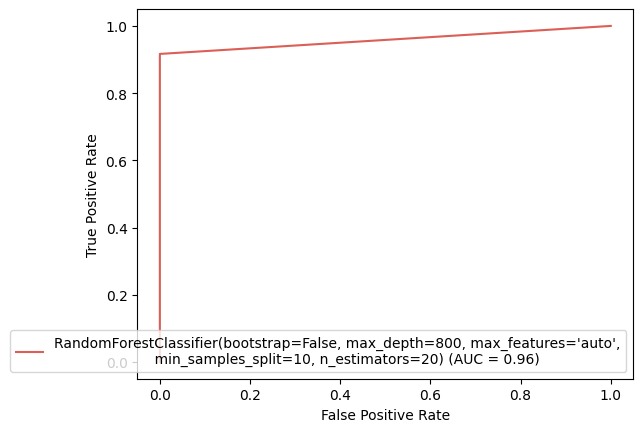

In [158]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_rf)
display.plot()

The AUC for Random Forest Classifier is 0.96

##### Gradient Boosting

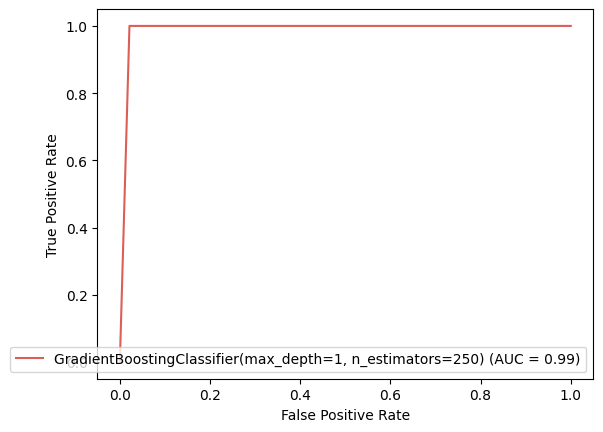

In [159]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_gb)
display.plot()

The AUC for Gradient Bossting model is 0.99

##### CatBoost

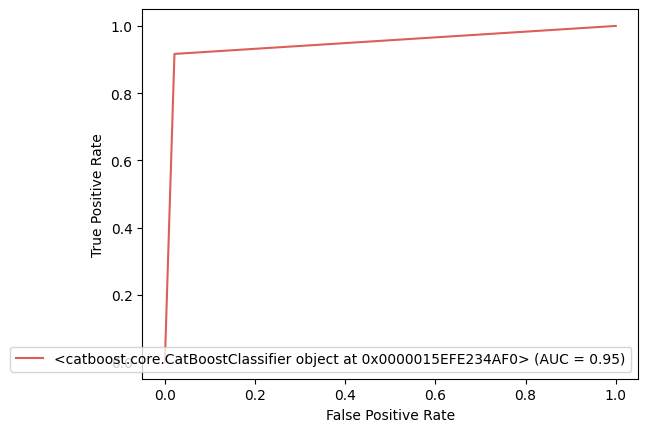

In [160]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_cb)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_cb)
display.plot()

The AUC for CatBoost is 0.95

##### KNN

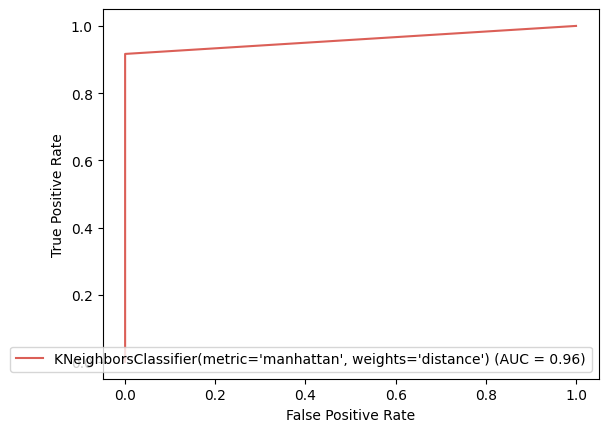

In [161]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model_knn)
display.plot()

The AUC value for KNN model is 0.96

From all the above ROC curves and AUC values, we see that Logistic Regression and Gradient Boosting have the same AUC value. From our previous analysis we observed that the Gradient Boosting model was less overfitting than Logistic Regression. So we will choose that as the final model.

### Saving the model

In [162]:
import pickle

In [163]:
filename = 'glass_model.pkl'
pickle.dump(model_gb, open(filename, 'wb'))

#### Predicting using the saved model

In [164]:
model = pickle.load(open(filename, 'rb'))

pred = model.predict(x_test)

In [165]:
df = pd.DataFrame({'Actual': np.array(y_test), 'Predicted': pred})
df

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,1,1
7,0,0
8,0,0
9,0,0
